In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as random
%matplotlib inline
from casadi import *


### Première étape : DOC  $\longrightarrow $ trouver q ( où q est la trajectoire)
On suppose qu'on connait la constante 'c' et on cherche à minimiser notre projectoire x [où x =(abscisse, ordonne, angle)] et u [ où u=(vitesse, vitesse angulaire)]

In [2]:
n = 500           ## notre discrétisation
taux = 1/n              # notre delta_t

#### Soit notre problème (1) suivant :

Soit taux = 1/n 


$$  min_{x^i,u^i} \ \ \frac{1}{2} \tau \sum_{i=0}^{N} (c_1 (u_1^i)^2 + c_2 (u_2^i)^2 )  
\\[0.5 cm]
\ \begin{align*}  
S.C  \ \ \ & x_1^{(i+1)} = x_1^i + \tau u_1^i cos(x_3^i)  \\ 
 & x_2^{(i+1)} = x_2^i + \tau u_1^i sin(x_3^i)   \\
 & x_3^{(i+1)} = x_3^i + \tau u_2^i    \\
 & x^0 = x_{start} \\
 & x^N = x_{goal}
\end{align*}
$$

In [4]:
def tracer_orientation (x,y,theta, r, i):
    if i == 1 :
        plt.arrow(x, y, r*cos(theta),r*sin(theta), width = 0.01, color = 'red' , label = "Axe local suivant x")
        plt.arrow(x, y, r*cos(pi/2+theta),r*sin(pi/2+theta), width = 0.01, color = 'yellow' , label = "Axe local suivant y")
        plt.legend()
    else :
        plt.arrow(x, y, r*cos(theta),r*sin(theta), width = 0.01, color = 'red' )
        plt.arrow(x, y, r*cos(pi/2+theta),r*sin(pi/2+theta), width = 0.01, color = 'yellow' )
    

In [5]:
# Notre fonction contient au totale 5*n  variable où u1, u2, x1, x2 et x3 sont des vecteur de taille n

# Je defini le vecteur :

u1=SX.sym('u1',n)       ## notre vecteur vitesse

u2=SX.sym('u2',n)       ## notre vecteur vitesse angulaire

## Pour les xi ont va entrer nos xi_initial et xi_final

x1=SX.sym('x1',n)       ## notre vecteur des abssices

x2=SX.sym('x2',n)       ## notre vecteur des ordonnées

x3=SX.sym('x3',n)      ## notre vecteur des angles

Des fonctions qui nous aidera pour résoudre le problème.

In [6]:
f= Function('f',[x1],[x1[1:]])

Minimison maintenant $(1)$

Exemple 1 :

In [7]:
C1_1 = 0.2001              
C2_1 = 0.7999


x1_1i = -4                   # condition initiale de x1
x2_1i = -0.9                 # condition initiale de x2
x3_1i = pi              # condition initiale de x3


x1_1f = 0           # condition final de x1
x2_1f = 0.2            # condition final de x2
x3_1f = pi/2         # condition final de x3

In [8]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

u1 = opti.variable(n)
u2 = opti.variable(n)
x1 = opti.variable(n)
x2 = opti.variable(n)
x3 = opti.variable(n)

opti.minimize(   (taux/2)*(C1_1*dot(u1,u1)+C2_1*dot(u2,u2))   )    # ma fonction objetion

# mes fonctions de contrainte d'égalité:

## pour les condition initial
opti.subject_to( x1[0]==x1_1i)        
opti.subject_to( x2[0]==x2_1i)
opti.subject_to( x3[0]==x3_1i)

opti.subject_to( u1[0] == 0.0001 )
opti.subject_to( u2[0] == 0.0001 )

opti.subject_to( u1[-1] == 0.0001)
opti.subject_to( u2[-1] == 0.0001)


## pour les contraintes d'égaliter
opti.subject_to( u1[:n-1]*cos(x3[:n-1])==(x1[1:] - x1[:n-1])/taux )
opti.subject_to( u1[:n-1]*sin(x3[:n-1])==(x2[1:] - x2[:n-1])/taux )
opti.subject_to( u2[:n-1] ==(x3[1:] - x3[:n-1])/taux)

## pour les conditions finales
opti.subject_to( x1[-1]==x1_1f)
opti.subject_to( x2[-1]==x2_1f)
opti.subject_to( x3[-1]==x3_1f)


opti.solver('ipopt')      # suivant la méthode de KKT


sol = opti.solve()




******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:     5499
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1998

Total number of variables............................:     2500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1507
Total number of inequality co

##### Vérifiant si nos résultats sont cohérant.

In [9]:
U1_1 = sol.value(u1)
U2_1 = sol.value(u2)
X1_1 = sol.value(x1)
X2_1 = sol.value(x2)
X3_1 = sol.value(x3)

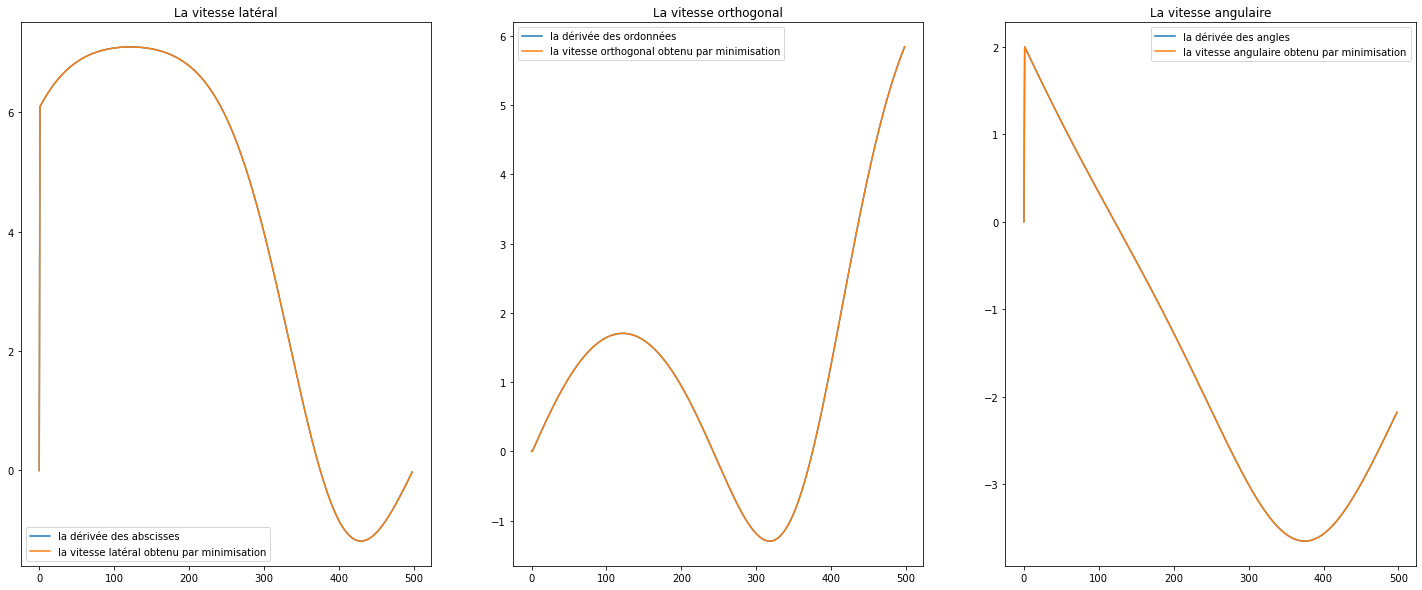

In [10]:
X_1 = (X1_1[1:] - X1_1[:n-1])/taux
X_2 = (X2_1[1:] - X2_1[:n-1])/taux
X_3 = (X3_1[1:] - X3_1[:n-1])/taux

Y_1 = U1_1[:n-1]*cos(X3_1[:n-1])
Y_2 = U1_1[:n-1]*sin(X3_1[:n-1])
Y_3 = U2_1[:n-1]


plt.subplots(figsize=(25, 10))
plt.subplot(1,3,1)
plt.plot(X_1, label = "la dérivée des abscisses")
plt.plot(Y_1, label = "la vitesse latéral obtenu par minimisation")
plt.title("La vitesse latéral")
plt.legend()


plt.subplot(1,3,2)
plt.plot(X_2, label = "la dérivée des ordonnées")
plt.plot(Y_2, label = "la vitesse orthogonal obtenu par minimisation")
plt.title("La vitesse orthogonal")
plt.legend()



plt.subplot(1,3,3)
plt.plot(X_3, label = "la dérivée des angles")
plt.plot(Y_3, label = "la vitesse angulaire obtenu par minimisation")
plt.title("La vitesse angulaire")
plt.legend()


#### Illustratant notre trajecteur obtenu.

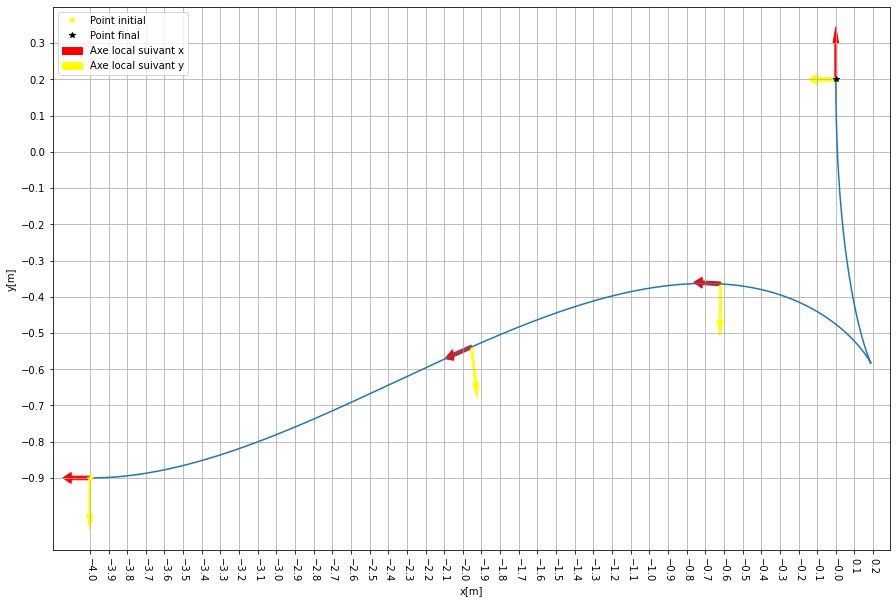

In [11]:
plt.figure(figsize=(15,10))
plt.plot (X1_1,X2_1 )
plt.plot(x1_1i,x2_1i, '*', label = 'Point initial', color = 'yellow')
plt.plot(x1_1f,x2_1f, '*', label = 'Point final', color = 'black')

tracer_orientation (X1_1[0],X2_1[0],X3_1[0], 0.1,0)


tracer_orientation (X1_1[150],X2_1[150],X3_1[150],0.1,0)

tracer_orientation (X1_1[250],X2_1[250],X3_1[250],0.1,0)

tracer_orientation (X1_1[-1],X2_1[-1],X3_1[-1],0.1,1)

plt.xlim(min(X1_1)-0.2, max(X1_1)+0.1)
plt.ylim(min(X2_1)-0.2, max(X2_1)+0.2)


plt.xticks(np.arange(min(X1_1), max(X1_1)+0.1, 0.1),rotation=-90)
plt.yticks(np.arange(min(X2_1),max(X2_1)+0.1, 0.1))


plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.grid(True)
plt.legend()

Exemple 2 : 

In [12]:
C1_2 = 0.8
C2_2 = 0.2

x1_2i = -4                   # condition initiale de x1
x2_2i = -3.4                 # condition initiale de x2
x3_2i = pi/4              # condition initiale de x3


x1_2f = 0           # condition final de x1
x2_2f = 0            # condition final de x2
x3_2f = pi/2         # condition final de x3

In [13]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

u1 = opti.variable(n)
u2 = opti.variable(n)
x1 = opti.variable(n)
x2 = opti.variable(n)
x3 = opti.variable(n)

opti.minimize(   (taux/2)*(C1_2*dot(u1,u1)+C2_2*dot(u2,u2))   )    # ma fonction objetion

# mes fonctions de contrainte d'égalité:

## pour les condition initial
opti.subject_to( x1[0]==x1_2i)        
opti.subject_to( x2[0]==x2_2i)
opti.subject_to( x3[0]==x3_2i)


opti.subject_to( u1[0] == 0.0001 )
opti.subject_to( u2[0] == 0.0001 )

opti.subject_to( u1[-1] == 0.0001)
opti.subject_to( u2[-1] == 0.0001)

## pour les contraintes d'égaliter
opti.subject_to( u1[:n-1]*cos(x3[:n-1])==(x1[1:] - x1[:n-1])/taux )
opti.subject_to( u1[:n-1]*sin(x3[:n-1])==(x2[1:] - x2[:n-1])/taux )
opti.subject_to( u2[:n-1] ==(x3[1:] - x3[:n-1])/taux)

## pour les conditions finales
opti.subject_to( x1[-1]==x1_2f)
opti.subject_to( x2[-1]==x2_2f)
opti.subject_to( x3[-1]==x3_2f)


opti.solver('ipopt')      # suivant la méthode de KKT


sol = opti.solve()


U1_2 = sol.value(u1)
U2_2 = sol.value(u2)
X1_2 = sol.value(x1)
X2_2 = sol.value(x2)
X3_2 = sol.value(x3)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:     5499
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1998

Total number of variables............................:     2500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1507
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

  87  5.7309369e+01 2.80e+00 2.82e-02  -3.8 3.08e+01  -4.0 1.00e+00 1.25e-01h  4
  88  5.6660924e+01 3.03e+00 4.00e-02  -3.8 2.00e+01  -3.6 1.00e+00 2.50e-01h  3
  89  5.5715382e+01 3.98e+00 6.66e-02  -3.8 7.28e+01  -3.2 1.00e+00 6.25e-02f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  90  4.4177327e+01 7.90e+00 1.14e-01  -3.8 8.90e+00  -2.8 1.00e+00 1.00e+00f  1
  91  4.0114398e+01 6.70e+00 5.98e-02  -3.8 1.01e+01    -  1.00e+00 1.00e+00f  1
  92  3.9601685e+01 7.53e+00 6.70e-02  -3.8 1.15e+01    -  1.00e+00 1.00e+00h  1
  93  3.6112080e+01 3.00e+00 2.21e-02  -3.8 9.31e+00    -  1.00e+00 1.00e+00h  1
  94  3.5878325e+01 2.46e+00 1.96e-02  -3.8 8.54e+00    -  1.00e+00 5.00e-01h  2
  95  3.5826800e+01 2.37e+00 1.91e-02  -3.8 2.01e+01    -  1.00e+00 1.25e-01h  4
  96  3.3247341e+01 2.81e-01 2.97e-03  -3.8 1.83e+00  -3.2 1.00e+00 1.00e+00h  1
  97  3.3170727e+01 4.48e-01 4.57e-03  -3.8 1.12e+01  -3.7 1.00e+00 1.25e-01h  4
  98  3.1864831e+01 1.15e+00

 183  2.0135964e+01 1.96e-03 1.24e-03  -5.7 6.05e+00    -  1.00e+00 7.81e-03h  8
 184  2.0135928e+01 2.22e-03 1.24e-03  -5.7 6.26e+00    -  1.00e+00 7.81e-03h  8
 185  2.0135894e+01 2.51e-03 1.23e-03  -5.7 6.48e+00    -  1.00e+00 7.81e-03h  8
 186  2.2622536e+01 5.95e+00 4.89e-02  -5.7 6.73e+00    -  1.00e+00 1.00e+00w  1
 187  2.0258937e+01 5.33e-01 3.75e-03  -5.7 5.58e+00    -  1.00e+00 1.00e+00w  1
 188  2.2333989e+01 5.40e+00 4.35e-02  -5.7 6.64e+00    -  1.00e+00 1.00e+00w  1
 189  2.0135862e+01 2.81e-03 1.22e-03  -5.7 6.07e+00    -  1.00e+00 7.81e-03h  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190  2.0135834e+01 3.14e-03 1.21e-03  -5.7 7.00e+00    -  1.00e+00 7.81e-03h  8
 191  2.0135809e+01 3.49e-03 1.21e-03  -5.7 7.29e+00    -  1.00e+00 7.81e-03h  8
 192  2.0135790e+01 3.88e-03 1.20e-03  -5.7 7.61e+00    -  1.00e+00 7.81e-03h  8
 193  2.0135777e+01 4.30e-03 1.19e-03  -5.7 7.96e+00    -  1.00e+00 7.81e-03h  8
 194  2.0135771e+01 4.76e-03

##### Vérifiant si nos résultats sont cohérant.

In [14]:
U1_2 = sol.value(u1)
U2_2 = sol.value(u2)
X1_2 = sol.value(x1)
X2_2 = sol.value(x2)
X3_2 = sol.value(x3)


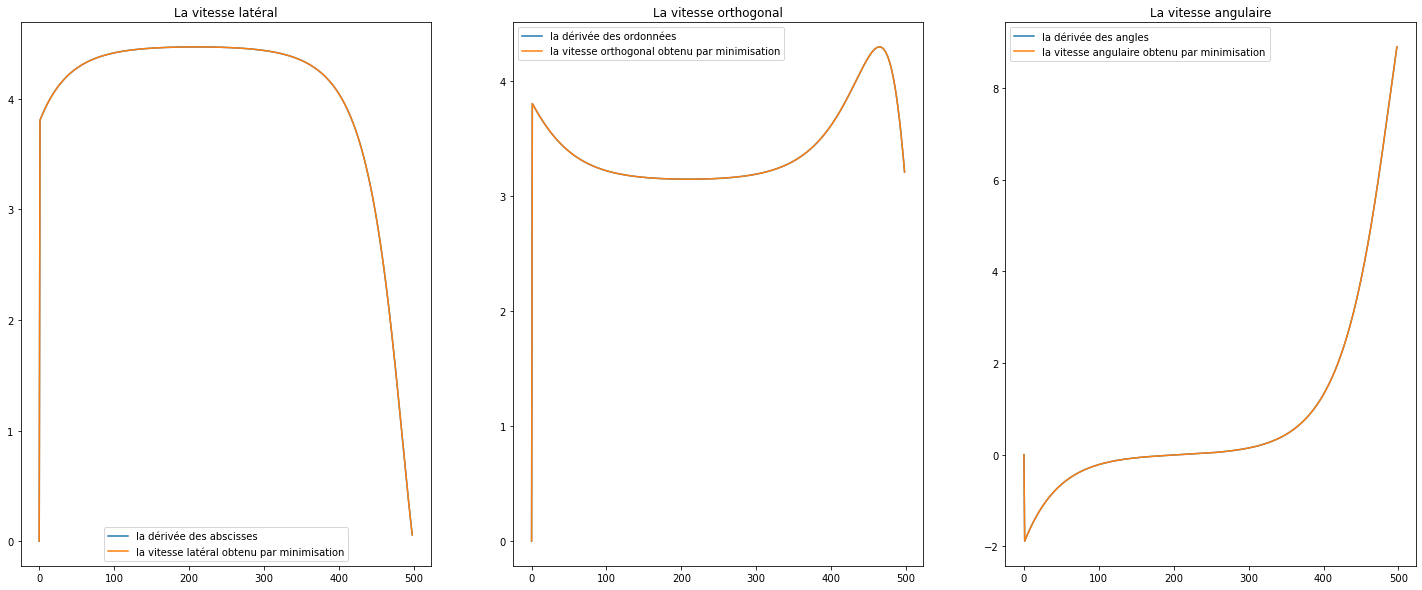

In [15]:
X_1 = (X1_2[1:] - X1_2[:n-1])/taux
X_2 = (X2_2[1:] - X2_2[:n-1])/taux
X_3 = (X3_2[1:] - X3_2[:n-1])/taux

Y_1 = U1_2[:n-1]*cos(X3_2[:n-1])
Y_2 = U1_2[:n-1]*sin(X3_2[:n-1])
Y_3 = U2_2[:n-1]


plt.subplots(figsize=(25, 10))
plt.subplot(1,3,1)
plt.plot(X_1, label = "la dérivée des abscisses")
plt.plot(Y_1, label = "la vitesse latéral obtenu par minimisation")
plt.title("La vitesse latéral")
plt.legend()


plt.subplot(1,3,2)
plt.plot(X_2, label = "la dérivée des ordonnées")
plt.plot(Y_2, label = "la vitesse orthogonal obtenu par minimisation")
plt.title("La vitesse orthogonal")
plt.legend()



plt.subplot(1,3,3)
plt.plot(X_3, label = "la dérivée des angles")
plt.plot(Y_3, label = "la vitesse angulaire obtenu par minimisation")
plt.title("La vitesse angulaire")
plt.legend()


#### Illustratant notre trajecteur obtenu.

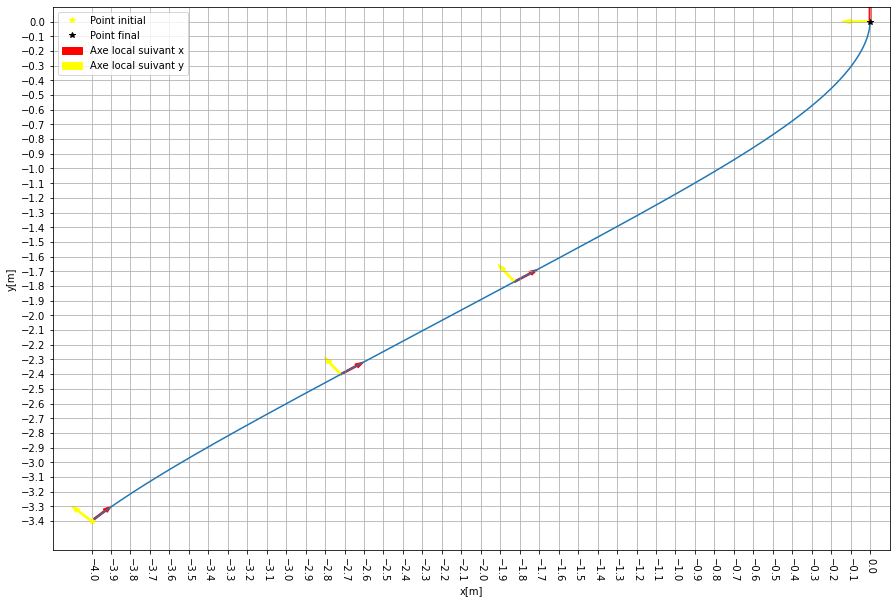

In [16]:
plt.figure(figsize = (15,10))
plt.plot (X1_2,X2_2 )

tracer_orientation (X1_2[0],X2_2[0],X3_2[0],0.1,0)

tracer_orientation (X1_2[150],X2_2[150],X3_2[150],0.1,0)

tracer_orientation (X1_2[250],X2_2[250],X3_2[250],0.1,0)

tracer_orientation (X1_2[-1],X2_2[-1],X3_2[-1],0.1,1)


plt.plot(x1_2i,x2_2i, '*', label = 'Point initial', color = 'yellow')
plt.plot(x1_2f,x2_2f, '*', label = 'Point final', color = 'black')

plt.xlim(X1_2[0]-0.2, max(X1_2)+0.1)
plt.ylim(X2_2[0]-0.2, max(X2_2)+0.1)


plt.xticks(np.arange(X1_2[0], max(X1_2)+0.1, 0.1), rotation=-90)
plt.yticks(np.arange(X2_2[0], max(X2_2)+0.1, 0.1))
plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.grid(True)
plt.legend()

Exemple 3 :

In [17]:

C1_3 = 0.1
C2_3 = 0.9 

x1_3i = -1.2                   # condition initiale de x1
x2_3i = 1.5                 # condition initiale de x2
x3_3i = pi              # condition initiale de x3


x1_3f = 0            # condition final de x1
x2_3f = 0            # condition final de x2
x3_3f = pi/2         # condition final de x3

In [18]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

u1 = opti.variable(n)
u2 = opti.variable(n)
x1 = opti.variable(n)
x2 = opti.variable(n)
x3 = opti.variable(n)

opti.minimize(   (taux/2)*(C1_3*dot(u1,u1)+C2_3*dot(u2,u2))   )    # ma fonction objetion

# mes fonctions de contrainte d'égalité:

## pour les condition initial
opti.subject_to( x1[0]==x1_3i)        
opti.subject_to( x2[0]==x2_3i)
opti.subject_to( x3[0]==x3_3i)

opti.subject_to( u1[0] == 0.0001 )
opti.subject_to( u2[0] == 0.0001 )

opti.subject_to( u1[-1] == 0.0001)
opti.subject_to( u2[-1] == 0.0001)

## pour les contraintes d'égaliter
opti.subject_to( u1[:n-1]*cos(x3[:n-1])==(x1[1:] - x1[:n-1])/taux )
opti.subject_to( u1[:n-1]*sin(x3[:n-1])==(x2[1:] - x2[:n-1])/taux )
opti.subject_to( u2[:n-1] ==(x3[1:] - x3[:n-1])/taux)


## pour les conditions finales
opti.subject_to( x1[-1]==x1_3f)
opti.subject_to( x2[-1]==x2_3f)
opti.subject_to( x3[-1]==x3_3f)


opti.solver('ipopt')      # suivant la méthode de KKT


sol = opti.solve()

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:     5499
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1998

Total number of variables............................:     2500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1507
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 3.14e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

##### Vérifiant si nos résultats sont cohérant.

In [19]:
U1_3 = sol.value(u1)
U2_3 = sol.value(u2)
X1_3 = sol.value(x1)
X2_3 = sol.value(x2)
X3_3 = sol.value(x3)

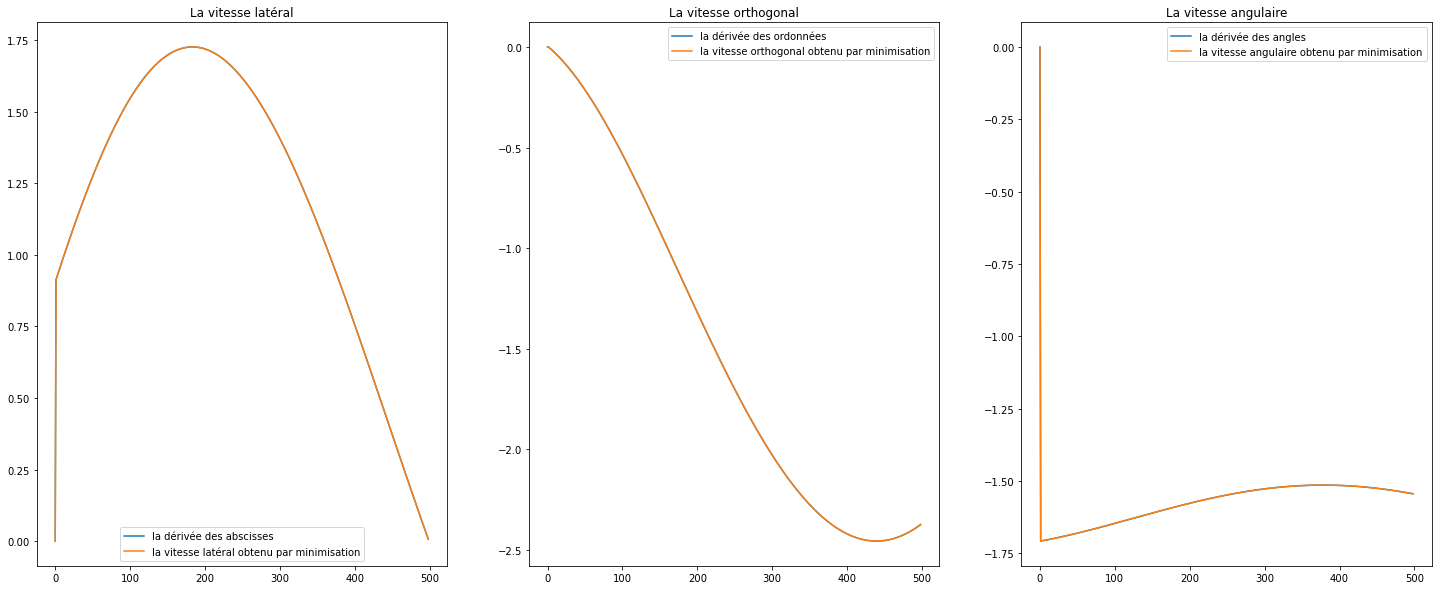

In [20]:
X_1 = (X1_3[1:] - X1_3[:n-1])/taux
X_2 = (X2_3[1:] - X2_3[:n-1])/taux
X_3 = (X3_3[1:] - X3_3[:n-1])/taux

Y_1 = U1_3[:n-1]*cos(X3_3[:n-1])
Y_2 = U1_3[:n-1]*sin(X3_3[:n-1])
Y_3 = U2_3[:n-1]


plt.subplots(figsize=(25, 10))
plt.subplot(1,3,1)
plt.plot(X_1, label = "la dérivée des abscisses")
plt.plot(Y_1, label = "la vitesse latéral obtenu par minimisation")
plt.title("La vitesse latéral")
plt.legend()


plt.subplot(1,3,2)
plt.plot(X_2, label = "la dérivée des ordonnées")
plt.plot(Y_2, label = "la vitesse orthogonal obtenu par minimisation")
plt.title("La vitesse orthogonal")
plt.legend()



plt.subplot(1,3,3)
plt.plot(X_3, label = "la dérivée des angles")
plt.plot(Y_3, label = "la vitesse angulaire obtenu par minimisation")
plt.title("La vitesse angulaire")
plt.legend()


#### Illustratant notre trajecteur obtenu.

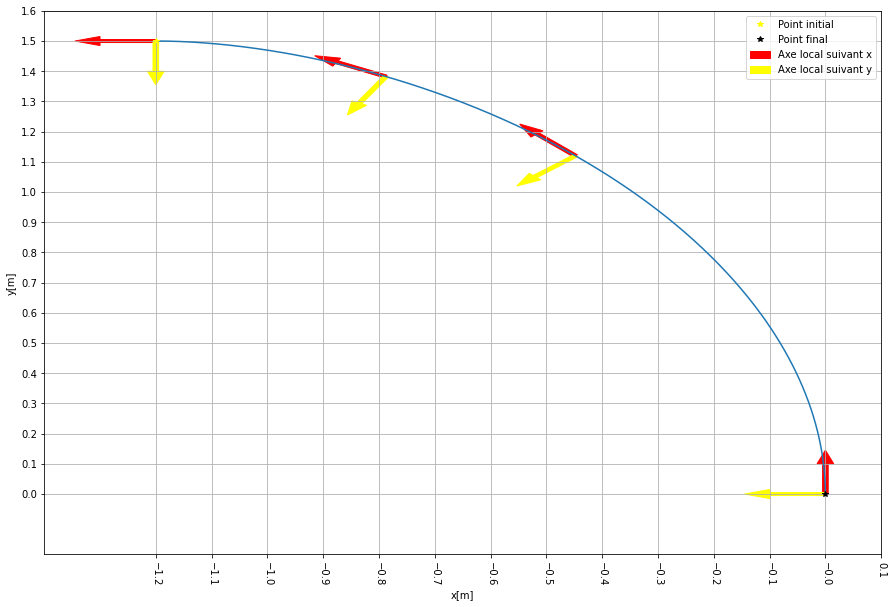

In [21]:
plt.figure(figsize = (15,10))
plt.plot (X1_3,X2_3 )

tracer_orientation (X1_3[0],X2_3[0],X3_3[0], 0.1,0)

tracer_orientation (X1_3[150],X2_3[150],X3_3[150],0.1,0)

tracer_orientation (X1_3[250],X2_3[250],X3_3[250],0.1,0)

tracer_orientation (X1_3[-1],X2_3[-1],X3_3[-1],0.1,1)

plt.plot(x1_3i,x2_3i, '*', label = 'Point initial', color = 'yellow')
plt.plot(x1_3f,x2_3f, '*', label = 'Point final', color = 'black')

plt.xlim(min(X1_3)-0.2, max(X1_3)+0.1)
plt.ylim(min(X2_3)-0.2, max(X2_3)+0.1)


plt.xticks(np.arange(min(X1_3), max(X1_3)+0.1, 0.1),rotation=-90)
plt.yticks(np.arange(min(X2_3), max(X2_3)+0.1, 0.1))
plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.grid(True)
plt.legend()


Exemple 4 : 

In [22]:

C1_4 = 0.55 
C2_4 = 0.45

x1_4i = 0.4                   # condition initiale de x1
x2_4i = 5                 # condition initiale de x2
x3_4i = pi/4              # condition initiale de x3


x1_4f = 10.4            # condition final de x1
x2_4f = 5.6            # condition final de x2
x3_4f = pi/2         # condition final de x3

In [23]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

u1 = opti.variable(n)
u2 = opti.variable(n)
x1 = opti.variable(n)
x2 = opti.variable(n)
x3 = opti.variable(n)

opti.minimize(   (taux/2)*(C1_4*dot(u1,u1)+C2_4*dot(u2,u2))   )    # ma fonction objetion

# mes fonctions de contrainte d'égalité:

## pour les condition initial
opti.subject_to( x1[0]==x1_4i)        
opti.subject_to( x2[0]==x2_4i)
opti.subject_to( x3[0]==x3_4i)


opti.subject_to( u1[0] == 0.0001 )
opti.subject_to( u2[0] == 0.0001 )

opti.subject_to( u1[-1] == 0.0001)
opti.subject_to( u2[-1] == 0.0001)

## pour les contraintes d'égaliter
opti.subject_to( u1[:n-1]*cos(x3[:n-1])==(x1[1:] - x1[:n-1])/taux )
opti.subject_to( u1[:n-1]*sin(x3[:n-1])==(x2[1:] - x2[:n-1])/taux )
opti.subject_to( u2[:n-1] ==(x3[1:] - x3[:n-1])/taux)


## pour les conditions finales
opti.subject_to( x1[-1]==x1_4f)
opti.subject_to( x2[-1]==x2_4f)
opti.subject_to( x3[-1]==x3_4f)


opti.solver('ipopt')      # suivant la méthode de KKT


sol = opti.solve()

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:     5499
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1998

Total number of variables............................:     2500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1507
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.04e+01 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

##### Vérifiant si nos résultats sont cohérant.

In [24]:
U1_4 = sol.value(u1)
U2_4 = sol.value(u2)
X1_4 = sol.value(x1)
X2_4 = sol.value(x2)
X3_4 = sol.value(x3)

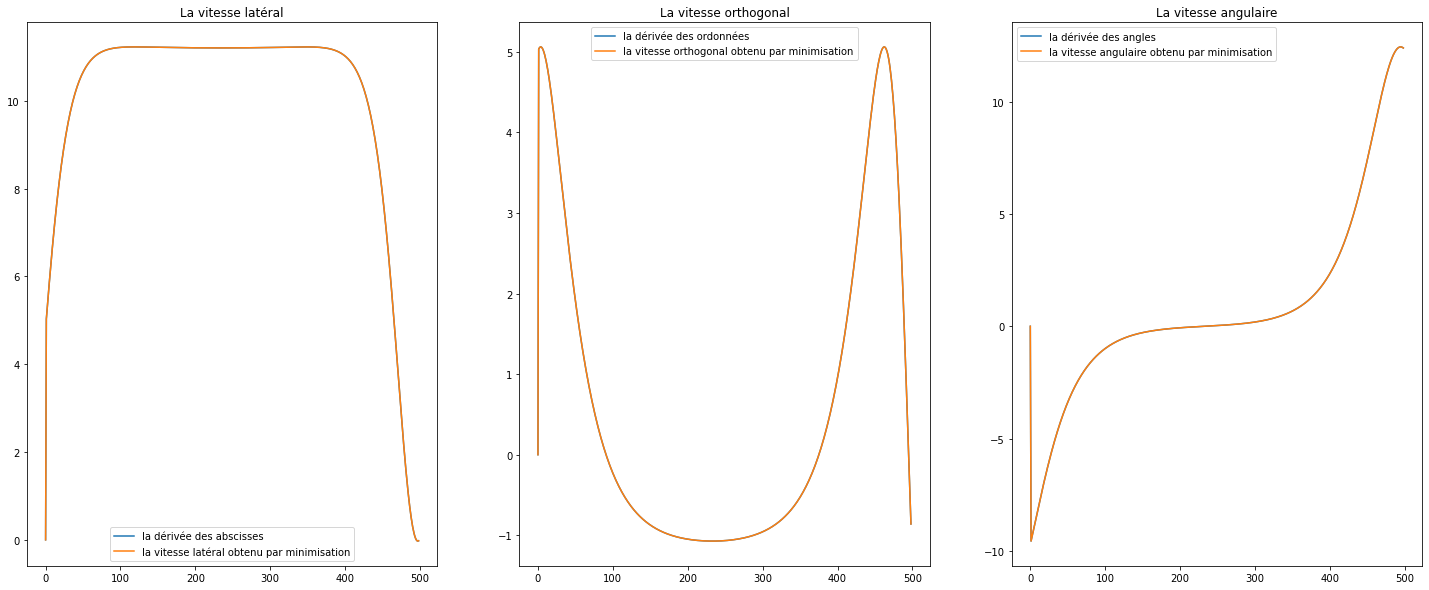

In [25]:
X_1 = (X1_4[1:] - X1_4[:n-1])/taux
X_2 = (X2_4[1:] - X2_4[:n-1])/taux
X_3 = (X3_4[1:] - X3_4[:n-1])/taux

Y_1 = U1_4[:n-1]*cos(X3_4[:n-1])
Y_2 = U1_4[:n-1]*sin(X3_4[:n-1])
Y_3 = U2_4[:n-1]


plt.subplots(figsize=(25, 10))
plt.subplot(1,3,1)
plt.plot(X_1, label = "la dérivée des abscisses")
plt.plot(Y_1, label = "la vitesse latéral obtenu par minimisation")
plt.title("La vitesse latéral")
plt.legend()


plt.subplot(1,3,2)
plt.plot(X_2, label = "la dérivée des ordonnées")
plt.plot(Y_2, label = "la vitesse orthogonal obtenu par minimisation")
plt.title("La vitesse orthogonal")
plt.legend()



plt.subplot(1,3,3)
plt.plot(X_3, label = "la dérivée des angles")
plt.plot(Y_3, label = "la vitesse angulaire obtenu par minimisation")
plt.title("La vitesse angulaire")
plt.legend()


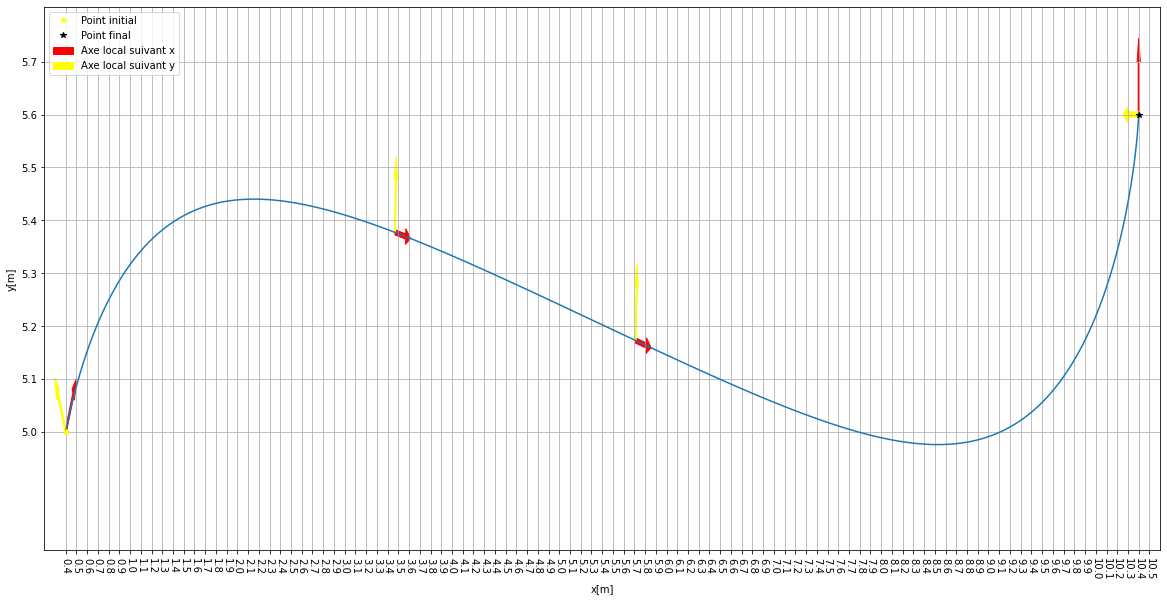

In [26]:
plt.figure(figsize= (20,10))
plt.plot (X1_4,X2_4 )

tracer_orientation (X1_4[0],X2_4[0],X3_4[0], 0.1,0)

tracer_orientation (X1_4[150],X2_4[150],X3_4[150],0.1,0)

tracer_orientation (X1_4[250],X2_4[250],X3_4[250],0.1,0)

tracer_orientation (X1_4[-1],X2_4[-1],X3_4[-1],0.1,1)

plt.xlim(min(X1_4)-0.2, max(X1_4)+0.2)
plt.ylim(min(X2_4)-0.2, max(X2_4)+0.2)


plt.plot(x1_4i,x2_4i, '*', label = 'Point initial', color = 'yellow')
plt.plot(x1_4f,x2_4f, '*', label = 'Point final', color = 'black')


plt.xticks(np.arange(X1_4[0], max(X1_4)+0.1, 0.1),rotation=-90)
plt.yticks(np.arange(X2_4[0], max(X2_4)+0.1, 0.1))
plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.grid(True)
plt.legend()

### Deuxième étape : q ( où q est la trajectoire ) $\underrightarrow{IOC} $   trouver c 
On suppose qu'on connait la projectoire x [où x =(abscisse, ordonne, angle)] et u [ où u=(vitesse, vitesse angulaire)] et on cherche à trouver '$c = (c_1,c_2$)'. 

 On va transformer notre problème (1) ci_dessus qui est un problème sous contrainte en un problème sans contrainte. On va écrire notre Lagrangien L sous la forme suivante où h est défini en fonction de nos contrainte :

 $$ L(x^i , u^i , c1, c2, \lambda^i) = \frac{1}{2} \tau \sum_{i=0}^{N} (c_1 (u_1^i)^2 + c_2 (u_2^i)^2 ) + \sum_{i=0}^{N} h^i(x^i,u^i) \lambda^{i+1} $$ 


##### On peut remarquer que notre Lagrangien contient 5N + 1 + 3(N+1) variable au totale avec 5N pour (X,U), 1 pour c et 3(N+1) pour $\lambda$.

In [27]:
x1i = SX.sym('x1i',1)                   
x2i = SX.sym('x2i',1)                
x3i = SX.sym('x3i',1)


x1f = SX.sym('x1f',1)
x2f = SX.sym('x2f',1)
x3f = SX.sym('x3f',1)

In [28]:
# Je defini les vecteurs suivant :

c1 = SX.sym('c1',1)
c2 = SX.sym('c2',1)


u1=SX.sym('u1',n)  
u1_prime = SX.sym('u1_prime', n+1)
u1_prime[0] = 0
u1_prime[n] = 0
u1_prime[1:n] =u1[0:n-1]

u2=SX.sym('u2',n)  
u2_prime = SX.sym('u2_prime', n+1)
u2_prime[0] = 0
u2_prime[n] = 0
u2_prime[1:n] =u2[0:n-1]

x1=SX.sym('x1',n)
x1_prime = SX.sym('x1_prime', n+1)
x1_prime[0] = x1[0]
x1_prime[1:] =x1


x2=SX.sym('x2',n)
x2_prime = SX.sym('x1_prime', n+1)
x2_prime[0] = x2[0]
x2_prime[1:] =x2

x3=SX.sym('x3',n)
x3_prime = SX.sym('x1_prime', n+1)
x3_prime[0] = x3[0]
x3_prime[1:] =x3

Lambda = SX.sym('Lambda',n+2, 3)
Mue = SX.sym('Mue',1)

In [29]:
p1=vertcat(x1i,x1_prime[2:],x1f)   # Je définis un nouveau vecteur suivant x1 en prenant les n-1 dernières valeurs 
                               #  et la nième valeur vaut x1f
g = Function('g',[x1,x1i,x1f],[p1])

In [31]:
Y1 = (x1_prime+taux*u1_prime*cos(x3_prime) - g(x1,x1i,x1f))
Y2 = (x2_prime+taux*u1_prime*sin(x3_prime) - g(x2,x2i,x2f)) 
Y3 = (x3_prime+taux*u2_prime - g(x3,x3i,x3f))
Y = SX.sym('Y',n+1 , 3)        ## notre contrainte

for i in range (n+1):
    Y[i,0]= Y1[i]
    Y[i,1]= Y2[i]
    Y[i,2]= Y3[i]       

for i in range (n+1):
    Y[i,0]= Y1[i]
    Y[i,1]= Y2[i]
    Y[i,2]= Y3[i]       
    
Y_function = Function('Y_function', [u1,u2,x1,x2,x3], [Y])


In [32]:
## notre terme qui est relié a la contrainte.
G_lambda = 0

for i in range (n+1):
    G_lambda += dot(Y[i,:], Lambda[i,:])
    
G_lambda += (u1[0]-0.0001)*Lambda[n+1,0] + (u2[0]-0.0001)*Lambda[n+1,1] + (u1[-1]-0.0001)*Lambda[n+1,2] + (u2[-1]-0.0001)*Mue


G = Function('G', [x1,x2,x3, Lambda], [G_lambda])

## notre fonction F 
F_val = (taux/2)*(c1*dot(u1,u1)+c2*dot(u2,u2))


## le Lagrangien 
L_val = F_val + G_lambda
#print(L_val.shape)

Notre Lagrandien est donc defini par : 

In [33]:
L = Function('L', [u1,u2,x1,x2,x3, Lambda, Mue, c1,c2], [L_val])

##### Ecrivons une fonction résidue 'R' qui prend tout les paramètres en entrée et renvoie la matrice suivante.

$$ r(x^i, u^i, c_1, c_2, \lambda^i, \lambda^{i+1}) = \begin{pmatrix}
\nabla_{(x^i)}L(x,u,\lambda^{i+1})  \\
\nabla_{(u^i)}L(x,u,\lambda^{i+1})
\end{pmatrix} $$

In [34]:
L_x = SX.zeros(5, n)

for i in range (n):
    L_x[2,i]= jacobian(L_val, x1[i])
    L_x[3,i]= jacobian(L_val, x2[i])
    L_x[4,i]= jacobian(L_val, x3[i])
#print(L_x)
    
L_u = SX.zeros(5, n)
for i in range (n):
    L_u[0,i]= jacobian(L_val, u1[i])
    L_u[1,i]= jacobian(L_val, u2[i])

#print(L_u)

In [35]:
R = Function ('R', [u1,u2,x1,x2,x3, Lambda, Mue,  c1, c2, x1i,x2i,x3i, x1f,x2f,x3f ], [(dot(L_x,L_x) + dot(L_u,L_u))])

#### Soit notre problème IOC (2) suivant :

$$  min_{c_1,c_2, \lambda} \ \ \sum_{i=1}^{N} \| r(x^i, u^i, c_1, c_2, \lambda^i, \lambda^{i+1}) \|^2  $$

Premier exemple fait: 

In [36]:
C1_1 = 0.2001               
C2_1 = 0.7999


x1i = -4                   # condition initiale de x1
x2i = -0.9                 # condition initiale de x2
x3i = pi              # condition initiale de x3


x1f = 0           # condition final de x1
x2f = 0.2            # condition final de x2
x3f = pi/2         # condition final de x3

In [37]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

c1 = opti.variable(1)
c2 = opti.variable(1)


Lambda = opti.variable(n+2,3)
Mue = opti.variable(1)

opti.minimize( R(U1_1,U2_1,X1_1,X2_1,X3_1, Lambda,Mue, c1, c2 , x1i,x2i,x3i, x1f,x2f,x3f ))  

opti.subject_to( 0 <= c1)
opti.subject_to( 0 <= c2 )
opti.subject_to(  c1 + c2 == 1)

opti.solver('ipopt')    

sol = opti.solve()

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:     7008

Total number of variables............................:     1509
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [38]:
print(sol.value(c1))
print(sol.value(c2))

0.200100239383806
0.799899760616194


Deuxième exemple fait :

In [48]:
C1_2 = 0.8
C2_2 = 0.2

x1i = -4                   # condition initiale de x1
x2i = -3.4                 # condition initiale de x2
x3i = pi/4              # condition initiale de x3
x1f = 0           # condition final de x1
x2f = 0            # condition final de x2
x3f = pi/2         # condition final de x3

In [41]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

c1 = opti.variable(1)
c2 = opti.variable(1)


Lambda = opti.variable(n+2,3)
Mue = opti.variable(1)

opti.minimize( R(U1_2,U2_2,X1_2,X2_2,X3_2, Lambda,Mue, c1, c2 , x1i,x2i,x3i, x1f,x2f,x3f ))  

opti.subject_to( 0 <= c1)
opti.subject_to( 0 <= c2 )
opti.subject_to(  c1 + c2 == 1)

opti.solver('ipopt')    

sol = opti.solve()

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:     7008

Total number of variables............................:     1509
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [42]:
print(sol.value(c1))
print(sol.value(c2))

0.799999102233163
0.20000089776683708


Troisième exemple fait :

In [43]:
C1_3 = 0.1
C2_3 = 0.9 

x1i = -1.2                   # condition initiale de x1
x2i = 1.5                 # condition initiale de x2
x3i = pi              # condition initiale de x3


x1f = 0            # condition final de x1
x2f = 0            # condition final de x2
x3f = pi/2         # condition final de x3

In [44]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

c1 = opti.variable(1)
c2 = opti.variable(1)


Lambda = opti.variable(n+2,3)
Mue = opti.variable(1)



opti.minimize( R(U1_3,U2_3,X1_3,X2_3,X3_3, Lambda,Mue, c1, c2 , x1i,x2i,x3i, x1f,x2f,x3f ))  

opti.subject_to( 0 <= c1)
opti.subject_to( 0 <= c2 )
opti.subject_to(  c1 + c2 == 1)

opti.solver('ipopt')    

sol = opti.solve()

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:     7008

Total number of variables............................:     1509
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [45]:
print(sol.value(c1))
print(sol.value(c2))

0.10004025470634408
0.8999597452936559


Quatrième exemple fait :

In [46]:
C1_4 = 0.55 
C2_4 = 0.45

x1i = 0.4                   # condition initiale de x1
x2i = 5                 # condition initiale de x2
x3i = pi/4              # condition initiale de x3


x1f = 10.4            # condition final de x1
x2f = 5.6            # condition final de x2
x3f = pi/2         # condition final de x3

In [47]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

c1 = opti.variable(1)
c2 = opti.variable(1)


Lambda = opti.variable(n+2,3)
Mue = opti.variable(1)


opti.minimize( R(U1_4,U2_4,X1_4,X2_4,X3_4, Lambda,Mue, c1, c2 , x1i,x2i,x3i, x1f,x2f,x3f ))  

opti.subject_to( 0 <= c1)
opti.subject_to( 0 <= c2 )
opti.subject_to(  c1 + c2 == 1)

opti.solver('ipopt')    

sol = opti.solve()

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:     7008

Total number of variables............................:     1509
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [48]:
print(sol.value(c1))
print(sol.value(c2))

0.5499999801315913
0.4500000198684086


## Maintenant ajoutant du bruit.

In [49]:
sigma = np.logspace(-5,0, 100)      ## notre écart_type 


In [50]:
def évolution_residue (sigma, U1, U2, X1, X2, X3 , Xi, Xf, n) :
    Res = np.zeros(100)
    C1_prime = np.zeros(100)
    C2_prime = np.zeros(100)

    x1i = Xi[0]
    x2i = Xi[1]
    x3i = Xi[2]
    
    x1f = Xf[0]
    x2f = Xf[1]
    x3f = Xf[2]
    
    

    for i in range (100):
        U1__1 = U1 + np.random.normal (0, sigma[i], size =n)
        U2__1 = U2 + np.random.normal (0, sigma[i], size =n)
        X1__1 = X1 + np.random.normal (0, sigma[i], size =n)
        X2__1 = X2 + np.random.normal (0, sigma[i], size =n)
        X3__1 = X3 + np.random.normal (0, sigma[i], size =n)

        opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

        c1 = opti.variable(1)
        c2 = opti.variable(1)


        Lambda = opti.variable(n+2,3)
        Mue = opti.variable(1)


        opti.minimize( R( U1__1, U2__1, X1__1, X2__1, X3__1, Lambda,Mue, c1, c2 , x1i,x2i,x3i, x1f,x2f,x3f ))  

        opti.subject_to( 0 <= c1)

        opti.subject_to( 0 <= c2 )

        opti.subject_to(  c1 + c2 == 1)

        opti.solver('ipopt')    

        sol = opti.solve()

        C1_prime [i] = sol.value(c1)
        C2_prime [i] = sol.value(c2)

        Res [i] = R( U1__1, U2__1, X1__1, X2__1, X3__1, sol.value(Lambda), sol.value(Mue),sol.value(c1), sol.value(c2) , x1i,x2i,x3i, x1f,x2f,x3f )

        
    return Res , C1_prime, C2_prime

In [51]:
def RMSE_vecteur ( C1 ,C2 , U1, U2, X1, X2, X3, Xi, Xf, n) :
     
    RMSE = np.zeros(100)
    
    x1i = Xi[0]
    x2i = Xi[1]
    x3i = Xi[2]
    
    x1f = Xf[0]
    x2f = Xf[1]
    x3f = Xf[2]
    

    for i in range (100):

        print('i = ' , i)

        opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

        u1 = opti.variable(n)
        u2 = opti.variable(n)
        x1 = opti.variable(n)
        x2 = opti.variable(n)
        x3 = opti.variable(n)

        opti.minimize(   (taux/2)*(C1[i]*dot(u1,u1)+C2[i]*dot(u2,u2))   )    # ma fonction objetion

        # mes fonctions de contrainte d'égalité:

        ## pour les condition initial
        opti.subject_to( x1[0]==x1i)        
        opti.subject_to( x2[0]==x2i)
        opti.subject_to( x3[0]==x3i)


        opti.subject_to( u1[0] == 0.0001 )
        opti.subject_to( u2[0] == 0.0001 )
        opti.subject_to( u1[-1] == 0.001)
        opti.subject_to( u2[-1] == 0.001)

        ## pour les contraintes d'égaliter
        opti.subject_to( x1[:n-1]+taux*u1[:n-1]*cos(x3[:n-1])==f(x1) )
        opti.subject_to( x2[:n-1]+taux*u1[:n-1]*sin(x3[:n-1])==f(x2) )
        opti.subject_to( x3[:n-1]+taux*u2[:n-1] ==f(x3))

        ## pour les conditions finales
        opti.subject_to( x1[-1]==x1f)
        opti.subject_to( x2[-1]==x2f)
        opti.subject_to( x3[-1]==x3f)


        opti.solver('ipopt')      # suivant la méthode de KKT


        sol = opti.solve()

        RMSE [i] = np.sqrt ((np.linalg.norm(U1 - sol.value(u1))**2 + np.linalg.norm(U2 - sol.value(u2))**2   + np.linalg.norm(X1 - sol.value(x1))**2 + np.linalg.norm(X2 - sol.value(x2))**2 + np.linalg.norm(X3 - sol.value(x3))**2 )/n )
        
    return RMSE


Exemple 1

In [52]:
C1_1 = 0.2001               
C2_1 = 0.7999


x1i = -4                   # condition initiale de x1
x2i = -0.9                 # condition initiale de x2
x3i = pi              # condition initiale de x3


x1f = 0           # condition final de x1
x2f = 0.2            # condition final de x2
x3f = pi/2         # condition final de x3

In [53]:
Xi = np.array([x1i,x2i,x3i])
Xf = np.array([x1f,x2f,x3f])


Res, C1_prime, C2_prime = évolution_residue (sigma, U1_1, U2_1, X1_1, X2_1, X3_1 , Xi, Xf, n)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:     7008

Total number of variables............................:     1509
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

   5  9.0372151e-05 0.00e+00 1.50e-09  -3.8 7.31e-01    -  1.00e+00 1.00e+00f  1
   6  4.5038582e-06 0.00e+00 1.36e-04  -5.7 3.00e-01    -  9.42e-01 1.00e+00f  1
   7  3.4583437e-08 0.00e+00 1.84e-11  -5.7 7.88e-02    -  1.00e+00 1.00e+00f  1
   8  3.4915692e-12 0.00e+00 1.70e-08  -8.6 7.51e-03    -  1.00e+00 1.00e+00f  1
   9  1.7557302e-12 0.00e+00 2.51e-14  -8.6 5.22e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   1.7557301931956922e-12    1.7557301931956922e-12
Dual infeasibility......:   2.5059035596706026e-14    2.5059035596706026e-14
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5093233470067696e-09    2.5093233470067696e-09
Overall NLP error.......:   2.5093233470067696e-09    2.5093233470067696e-09


Number of objective function e

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:     7008

Total number of variables............................:     1509
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:     7008

Total number of variables............................:     1509
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:     7008

Total number of variables............................:     1509
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

   3  1.1474692e-03 0.00e+00 2.00e-07  -1.7 8.89e-02    -  1.00e+00 1.00e+00f  1
   4  7.5442702e-04 0.00e+00 2.80e-03  -3.8 2.61e-01    -  9.31e-01 1.00e+00f  1
   5  9.0372146e-05 0.00e+00 1.50e-09  -3.8 7.31e-01    -  1.00e+00 1.00e+00f  1
   6  4.5038868e-06 0.00e+00 1.36e-04  -5.7 3.00e-01    -  9.42e-01 1.00e+00f  1
   7  3.4654102e-08 1.11e-16 1.84e-11  -5.7 7.88e-02    -  1.00e+00 1.00e+00f  1
   8  7.5058580e-11 0.00e+00 1.70e-08  -8.6 7.51e-03    -  1.00e+00 1.00e+00f  1
   9  7.3322848e-11 1.11e-16 2.51e-14  -8.6 5.22e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   7.3322847740386962e-11    7.3322847740386962e-11
Dual infeasibility......:   2.5059035596706026e-14    2.5059035596706026e-14
Constraint violation....:   1.1102230246251565e-16    1.1102230246251565e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........

   2  1.0040714e-03 0.00e+00 2.35e+01  -1.7 8.42e-01    -  1.00e+00 5.00e-01f  2
   3  1.1474197e-03 0.00e+00 2.00e-07  -1.7 8.89e-02    -  1.00e+00 1.00e+00f  1
   4  7.5440005e-04 0.00e+00 2.80e-03  -3.8 2.61e-01    -  9.31e-01 1.00e+00f  1
   5  9.0367259e-05 0.00e+00 1.50e-09  -3.8 7.31e-01    -  1.00e+00 1.00e+00f  1
   6  4.5035918e-06 0.00e+00 1.36e-04  -5.7 3.00e-01    -  9.42e-01 1.00e+00f  1
   7  3.4764920e-08 2.22e-16 1.84e-11  -5.7 7.88e-02    -  1.00e+00 1.00e+00f  1
   8  1.9161683e-10 0.00e+00 1.70e-08  -8.6 7.51e-03    -  1.00e+00 1.00e+00f  1
   9  1.8988168e-10 0.00e+00 2.51e-14  -8.6 5.22e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   1.8988167636055524e-10    1.8988167636055524e-10
Dual infeasibility......:   2.5059035596706026e-14    2.5059035596706026e-14
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Variable bound viola

                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  1.7663351e-03 1.11e-16 4.70e+01  -1.7 2.93e+00    -  2.06e-02 1.00e+00f  1
   2  1.0039980e-03 1.11e-16 2.35e+01  -1.7 8.41e-01    -  1.00e+00 5.00e-01f  2
   3  1.1473404e-03 0.00e+00 2.00e-07  -1.7 8.90e-02    -  1.00e+00 1.00e+00f  1
   4  7.5436920e-04 0.00e+00 2.80e-03  -3.8 2.61e-01    -  9.31e-01 1.00e+00f  1
 

   6  4.5062205e-06 0.00e+00 1.36e-04  -5.7 3.00e-01    -  9.42e-01 1.00e+00f  1
   7  3.5590779e-08 0.00e+00 1.84e-11  -5.7 7.88e-02    -  1.00e+00 1.00e+00f  1
   8  9.9188633e-10 0.00e+00 1.70e-08  -8.6 7.51e-03    -  1.00e+00 1.00e+00f  1
   9  9.9014859e-10 0.00e+00 2.51e-14  -8.6 5.23e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   9.9014859003486118e-10    9.9014859003486118e-10
Dual infeasibility......:   2.5059035596706026e-14    2.5059035596706026e-14
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5093273083199559e-09    2.5093273083199559e-09
Overall NLP error.......:   2.5093273083199559e-09    2.5093273083199559e-09


Number of objective function evaluations             = 11
Number of objective gradient evaluations             

   8  2.3601855e-09 0.00e+00 1.70e-08  -8.6 7.51e-03    -  1.00e+00 1.00e+00f  1
   9  2.3584504e-09 2.22e-16 2.51e-14  -8.6 5.22e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   2.3584503661514930e-09    2.3584503661514930e-09
Dual infeasibility......:   2.5059035596706026e-14    2.5059035596706026e-14
Constraint violation....:   2.2204460492503131e-16    2.2204460492503131e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5093218826706402e-09    2.5093218826706402e-09
Overall NLP error.......:   2.5093218826706402e-09    2.5093218826706402e-09


Number of objective function evaluations             = 11
Number of objective gradient evaluations             = 10
Number of equality constraint evaluations            = 11
Number of inequality constraint evaluations          = 11
Number of equality constraint Jacobian ev

   4  7.5459146e-04 0.00e+00 2.80e-03  -3.8 2.61e-01    -  9.31e-01 1.00e+00f  1
   5  9.0408278e-05 0.00e+00 1.50e-09  -3.8 7.31e-01    -  1.00e+00 1.00e+00f  1
   6  4.5124726e-06 0.00e+00 1.36e-04  -5.7 3.00e-01    -  9.42e-01 1.00e+00f  1
   7  4.0715171e-08 1.11e-16 1.84e-11  -5.7 7.88e-02    -  1.00e+00 1.00e+00f  1
   8  6.0996894e-09 0.00e+00 1.71e-08  -8.6 7.51e-03    -  1.00e+00 1.00e+00f  1
   9  6.0979500e-09 0.00e+00 2.51e-14  -8.6 5.23e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   6.0979500051403154e-09    6.0979500051403154e-09
Dual infeasibility......:   2.5059035597119616e-14    2.5059035597119616e-14
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5093308808246150e-09    2.5093308808246150e-09
Overall NLP error.......:   

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:     7008

Total number of variables............................:     1509
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

   5  9.0408045e-05 0.00e+00 1.50e-09  -3.8 7.31e-01    -  1.00e+00 1.00e+00f  1
   6  4.5422483e-06 0.00e+00 1.36e-04  -5.7 3.00e-01    -  9.42e-01 1.00e+00f  1
   7  7.2602966e-08 0.00e+00 1.84e-11  -5.7 7.88e-02    -  1.00e+00 1.00e+00f  1
   8  3.8013164e-08 0.00e+00 1.70e-08  -8.6 7.51e-03    -  1.00e+00 1.00e+00f  1
   9  3.8011427e-08 0.00e+00 2.51e-14  -8.6 5.23e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   3.8011426819728038e-08    3.8011426819728038e-08
Dual infeasibility......:   2.5059035597119616e-14    2.5059035597119616e-14
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5093259969016557e-09    2.5093259969016557e-09
Overall NLP error.......:   2.5093259969016557e-09    2.5093259969016557e-09


Number of objective function e

   3  1.1475032e-03 0.00e+00 2.00e-07  -1.7 8.89e-02    -  1.00e+00 1.00e+00f  1
   4  7.5441002e-04 0.00e+00 2.80e-03  -3.8 2.61e-01    -  9.31e-01 1.00e+00f  1
   5  9.0436224e-05 0.00e+00 1.50e-09  -3.8 7.30e-01    -  1.00e+00 1.00e+00f  1
   6  4.5985185e-06 0.00e+00 1.36e-04  -5.7 3.00e-01    -  9.42e-01 1.00e+00f  1
   7  1.3344399e-07 0.00e+00 1.84e-11  -5.7 7.87e-02    -  1.00e+00 1.00e+00f  1
   8  9.8935128e-08 0.00e+00 1.69e-08  -8.6 7.50e-03    -  1.00e+00 1.00e+00f  1
   9  9.8933400e-08 0.00e+00 2.51e-14  -8.6 5.21e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   9.8933400075485483e-08    9.8933400075485483e-08
Dual infeasibility......:   2.5059035596706026e-14    2.5059035596706026e-14
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........

   9  1.9998834e-07 0.00e+00 2.51e-14  -8.6 5.19e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   1.9998834125264568e-07    1.9998834125264568e-07
Dual infeasibility......:   2.5059035597119616e-14    2.5059035597119616e-14
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5092675928410153e-09    2.5092675928410153e-09
Overall NLP error.......:   2.5092675928410153e-09    2.5092675928410153e-09


Number of objective function evaluations             = 12
Number of objective gradient evaluations             = 10
Number of equality constraint evaluations            = 12
Number of inequality constraint evaluations          = 12
Number of equality constraint Jacobian evaluations   = 10
Number of inequality constraint Jacobian evaluations = 10
Number

   1  1.7666744e-03 0.00e+00 4.70e+01  -1.7 2.93e+00    -  2.06e-02 1.00e+00f  1
   2  1.0043329e-03 0.00e+00 2.35e+01  -1.7 8.41e-01    -  1.00e+00 5.00e-01f  2
   3  1.1476008e-03 0.00e+00 2.00e-07  -1.7 8.89e-02    -  1.00e+00 1.00e+00f  1
   4  7.5464469e-04 0.00e+00 2.80e-03  -3.8 2.61e-01    -  9.31e-01 1.00e+00f  1
   5  9.0921429e-05 0.00e+00 1.50e-09  -3.8 7.30e-01    -  1.00e+00 1.00e+00f  1
   6  5.1479480e-06 0.00e+00 1.36e-04  -5.7 3.00e-01    -  9.42e-01 1.00e+00f  1
   7  6.8983390e-07 0.00e+00 1.84e-11  -5.7 7.87e-02    -  1.00e+00 1.00e+00f  1
   8  6.5543337e-07 1.11e-16 1.68e-08  -8.6 7.49e-03    -  1.00e+00 1.00e+00f  1
   9  6.5543165e-07 0.00e+00 2.51e-14  -8.6 5.19e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   6.5543165249019136e-07    6.5543165249019136e-07
Dual infeasibility......:   2.5059035597119616e-14    2.5059035597119616e-14
Constraint viola

   3  1.1401413e-03 0.00e+00 2.00e-07  -1.7 8.91e-02    -  1.00e+00 1.00e+00f  1
   4  7.5144901e-04 0.00e+00 2.78e-03  -3.8 2.60e-01    -  9.31e-01 1.00e+00f  1
   5  9.1190457e-05 0.00e+00 1.50e-09  -3.8 7.32e-01    -  1.00e+00 1.00e+00f  1
   6  6.0599337e-06 0.00e+00 1.35e-04  -5.7 3.00e-01    -  9.42e-01 1.00e+00f  1
   7  1.6503067e-06 0.00e+00 1.84e-11  -5.7 7.86e-02    -  1.00e+00 1.00e+00f  1
   8  1.6165245e-06 0.00e+00 1.61e-08  -8.6 7.45e-03    -  1.00e+00 1.00e+00f  1
   9  1.6165228e-06 1.11e-16 2.51e-14  -8.6 5.13e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   1.6165228308131579e-06    1.6165228308131579e-06
Dual infeasibility......:   2.5059035596292435e-14    2.5059035596292435e-14
Constraint violation....:   1.1102230246251565e-16    1.1102230246251565e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........

   2  1.0143020e-03 0.00e+00 2.35e+01  -1.7 8.45e-01    -  1.00e+00 5.00e-01f  2
   3  1.1582938e-03 0.00e+00 2.00e-07  -1.7 8.89e-02    -  1.00e+00 1.00e+00f  1
   4  7.6177185e-04 0.00e+00 2.81e-03  -3.8 2.62e-01    -  9.30e-01 1.00e+00f  1
   5  9.4925429e-05 0.00e+00 1.50e-09  -3.8 7.30e-01    -  1.00e+00 1.00e+00f  1
   6  8.5396995e-06 0.00e+00 1.36e-04  -5.7 3.01e-01    -  9.42e-01 1.00e+00f  1
   7  4.0314913e-06 0.00e+00 1.84e-11  -5.7 7.89e-02    -  1.00e+00 1.00e+00f  1
   8  3.9964125e-06 0.00e+00 1.76e-08  -8.6 7.55e-03    -  1.00e+00 1.00e+00f  1
   9  3.9964107e-06 0.00e+00 2.51e-14  -8.6 5.29e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   3.9964107092024394e-06    3.9964107092024394e-06
Dual infeasibility......:   2.5059035596292435e-14    2.5059035596292435e-14
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Variable bound viola

   6  1.5249299e-05 0.00e+00 1.35e-04  -5.7 3.01e-01    -  9.42e-01 1.00e+00f  1
   7  1.0865647e-05 0.00e+00 1.84e-11  -5.7 7.85e-02    -  1.00e+00 1.00e+00f  1
   8  1.0832251e-05 1.11e-16 1.55e-08  -8.6 7.43e-03    -  1.00e+00 1.00e+00f  1
   9  1.0832249e-05 0.00e+00 2.51e-14  -8.6 5.07e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   1.0832249140758753e-05    1.0832249140758753e-05
Dual infeasibility......:   2.5059035597119616e-14    2.5059035597119616e-14
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5090811359994918e-09    2.5090811359994918e-09
Overall NLP error.......:   2.5090811359994918e-09    2.5090811359994918e-09


Number of objective function evaluations             = 12
Number of objective gradient evaluations             

   2  1.0012514e-03 0.00e+00 2.35e+01  -1.7 8.32e-01    -  1.00e+00 5.00e-01f  2
   3  1.1413352e-03 0.00e+00 2.00e-07  -1.7 8.93e-02    -  1.00e+00 1.00e+00f  1
   4  7.6279507e-04 0.00e+00 2.75e-03  -3.8 2.58e-01    -  9.32e-01 1.00e+00f  1
   5  1.1259612e-04 0.00e+00 1.50e-09  -3.8 7.34e-01    -  1.00e+00 1.00e+00f  1
   6  2.9536408e-05 0.00e+00 1.33e-04  -5.7 3.00e-01    -  9.42e-01 1.00e+00f  1
   7  2.5306493e-05 0.00e+00 1.84e-11  -5.7 7.78e-02    -  1.00e+00 1.00e+00f  1
   8  2.5275175e-05 0.00e+00 1.29e-08  -8.6 7.25e-03    -  1.00e+00 1.00e+00f  1
   9  2.5275173e-05 0.00e+00 2.51e-14  -8.6 4.79e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   2.5275173341570977e-05    2.5275173341570977e-05
Dual infeasibility......:   2.5059035596292435e-14    2.5059035596292435e-14
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Variable bound viola

                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  1.8913825e-03 0.00e+00 4.70e+01  -1.7 2.93e+00    -  2.06e-02 1.00e+00f  1
   2  1.1017246e-03 0.00e+00 2.35e+01  -1.7 8.54e-01    -  1.00e+00 5.00e-01f  2
   3  1.2482917e-03 0.00e+00 2.00e-07  -1.7 8.92e-02    -  1.00e+00 1.00e+00f  1
   4  8.4203125e-04 0.00e+00 2.84e-03  -3.8 2.65e-01    -  9.30e-01 1.00e+00f  1
 

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:     7008

Total number of variables............................:     1509
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:     7008

Total number of variables............................:     1509
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

   4  2.0730539e-03 0.00e+00 3.40e-03  -3.8 3.35e-01    -  9.16e-01 1.00e+00f  1
   5  1.2013971e-03 0.00e+00 1.50e-09  -3.8 7.58e-01    -  1.00e+00 1.00e+00f  1
   6  1.0677648e-03 0.00e+00 1.82e-04  -5.7 3.37e-01    -  9.39e-01 1.00e+00f  1
   7  1.0581335e-03 0.00e+00 1.84e-11  -5.7 1.05e-01    -  1.00e+00 1.00e+00f  1
   8  1.0579863e-03 0.00e+00 1.89e-07  -8.6 1.44e-02    -  9.98e-01 1.00e+00f  1
   9  1.0579863e-03 0.00e+00 2.51e-14  -8.6 2.23e-04    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 9

                                   (scaled)                 (unscaled)
Objective...............:   1.0579862718853635e-03    1.0579862718853635e-03
Dual infeasibility......:   2.5059035851891245e-14    2.5059035851891245e-14
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5812423224373473e-09    2.5812423224373473e-09
Overall NLP error.......:   

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:     7008

Total number of variables............................:     1509
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

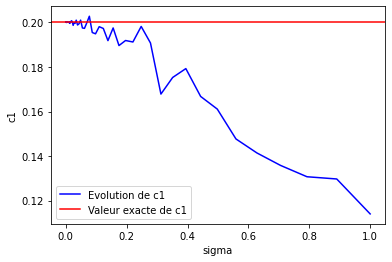

In [54]:
plt.plot(sigma, C1_prime , label = "Evolution de c1" , color = 'b')
plt.axhline(C1_1, label = "Valeur exacte de c1", color = 'red')

plt.xlabel('sigma')
plt.ylabel('c1')
plt.legend()

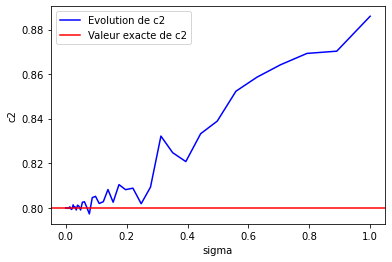

In [55]:
plt.plot(sigma, C2_prime , label = "Evolution de c2" , color = 'b')
plt.axhline(C2_1, label = "Valeur exacte de c2", color = 'red')

plt.xlabel('sigma')
plt.ylabel('c2')
plt.legend()

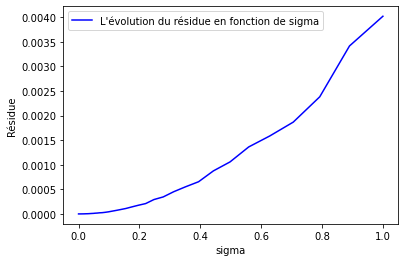

In [56]:
plt.plot(sigma, Res , label = "L'évolution du résidue en fonction de sigma" , color = 'b')
plt.xlabel('sigma')
plt.ylabel('Résidue')
plt.legend()

In [57]:
RMSE_1 = RMSE_vecteur ( C1_prime, C2_prime,U1_1, U2_1, X1_1, X2_1, X3_1 , Xi, Xf, n)

i =  0
This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:     5499
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1998

Total number of variables............................:     2500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1507
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.0

Total number of variables............................:     2500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1507
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  2.5980271e+00 1.61e-02 3.14e+03  -1.0 4.02e+00    -  1.00e+00 1.00e+00h  1
   2  8.2473392e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.5479521e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0906171e+0

   3  7.5479528e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0906173e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662224e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662570e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662098e+01 1.27e-11 9.76e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660683e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656443e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643760e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606064e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496043e+01 7.14e-07 9.53e-03  -3.8 8.80e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0191556e+01 5.82e-06 9.11e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4631349e+00 3.95e-05

   2  8.2473361e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.5479513e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0906168e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662218e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662565e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662093e+01 1.27e-11 9.76e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660678e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656438e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643755e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606058e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496037e+01 7.14e-07 9.53e-03  -3.8 8.80e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0191548e+01 5.82e-06

   2  8.2473429e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.5479530e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0906174e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662224e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662570e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662099e+01 1.27e-11 9.76e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660684e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656443e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643761e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606064e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496044e+01 7.14e-07 9.53e-03  -3.8 8.80e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0191557e+01 5.82e-06

   2  8.2473392e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.5479520e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0906171e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662221e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662567e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662096e+01 1.27e-11 9.76e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660681e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656440e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643758e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606061e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496040e+01 7.14e-07 9.53e-03  -3.8 8.80e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0191552e+01 5.82e-06

   1  2.5980387e+00 1.61e-02 3.14e+03  -1.0 4.02e+00    -  1.00e+00 1.00e+00h  1
   2  8.2473482e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.5479543e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0906178e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662228e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662575e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662103e+01 1.27e-11 9.76e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660688e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656448e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643765e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606069e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496049e+01 7.14e-07

   1  2.5980340e+00 1.61e-02 3.14e+03  -1.0 4.02e+00    -  1.00e+00 1.00e+00h  1
   2  8.2473446e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.5479534e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0906175e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662225e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662572e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662100e+01 1.27e-11 9.76e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660685e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656445e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643762e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606065e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496045e+01 7.14e-07

   6  1.0662564e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662093e+01 1.27e-11 9.76e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660678e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656437e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643755e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606058e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496037e+01 7.14e-07 9.53e-03  -3.8 8.80e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0191548e+01 5.82e-06 9.11e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4631231e+00 3.95e-05 8.01e-03  -3.8 6.65e-01  -1.9 1.00e+00 1.00e+00f  1
  15  8.2282399e+00 1.70e-04 5.81e-03  -3.8 1.45e+00  -2.4 1.00e+00 1.00e+00f  1
  16  7.0667712e+00 5.69e-04 3.10e-03  -3.8 2.32e+00  -2.9 1.00e+00 1.00e+00f  1
  17  6.7112119e+00 4.67e-03

   9  1.0656464e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643782e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606086e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496067e+01 7.14e-07 9.53e-03  -3.8 8.79e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0191586e+01 5.82e-06 9.11e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4631802e+00 3.95e-05 8.01e-03  -3.8 6.65e-01  -1.9 1.00e+00 1.00e+00f  1
  15  8.2283285e+00 1.70e-04 5.81e-03  -3.8 1.45e+00  -2.4 1.00e+00 1.00e+00f  1
  16  7.0668902e+00 5.69e-04 3.10e-03  -3.8 2.32e+00  -2.9 1.00e+00 1.00e+00f  1
  17  6.7113572e+00 4.67e-03 2.82e-03  -3.8 3.43e+00  -3.4 1.00e+00 1.00e+00f  1
  18  6.5201382e+00 5.47e-03 3.44e-03  -3.8 4.21e+01    -  1.00e+00 6.25e-02f  5
  19  6.4819196e+00 5.47e-03 7.12e-03  -3.8 5.09e+00    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

   2  8.2473449e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.5479535e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0906176e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662226e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662572e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662100e+01 1.27e-11 9.76e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660685e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656445e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643763e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606066e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496046e+01 7.14e-07 9.53e-03  -3.8 8.80e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0191559e+01 5.82e-06

   1  2.5980240e+00 1.61e-02 3.14e+03  -1.0 4.02e+00    -  1.00e+00 1.00e+00h  1
   2  8.2473368e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.5479515e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0906169e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662219e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662565e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662094e+01 1.27e-11 9.76e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660679e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656438e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643756e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606059e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496038e+01 7.14e-07

   3  7.5479499e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0906163e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662214e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662560e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662088e+01 1.27e-11 9.76e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660673e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656433e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643750e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606053e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496032e+01 7.14e-07 9.53e-03  -3.8 8.80e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0191541e+01 5.82e-06 9.11e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4631134e+00 3.95e-05

   1  2.5980539e+00 1.61e-02 3.14e+03  -1.0 4.02e+00    -  1.00e+00 1.00e+00h  1
   2  8.2473599e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.5479572e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0906189e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662238e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662584e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662113e+01 1.27e-11 9.76e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660698e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656457e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643775e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606079e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496060e+01 7.14e-07

   5  1.0662210e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662556e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662085e+01 1.27e-11 9.76e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660670e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656429e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643747e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606049e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496027e+01 7.14e-07 9.53e-03  -3.8 8.80e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0191536e+01 5.82e-06 9.11e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4631059e+00 3.95e-05 8.01e-03  -3.8 6.65e-01  -1.9 1.00e+00 1.00e+00f  1
  15  8.2282132e+00 1.70e-04 5.81e-03  -3.8 1.45e+00  -2.4 1.00e+00 1.00e+00f  1
  16  7.0667352e+00 5.69e-04

   3  7.5479610e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0906202e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662251e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662597e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662125e+01 1.27e-11 9.75e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660710e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656470e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643788e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606092e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496075e+01 7.14e-07 9.53e-03  -3.8 8.79e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0191595e+01 5.82e-06 9.11e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4631937e+00 3.95e-05

   4  1.0906213e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662261e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662607e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662136e+01 1.27e-11 9.75e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660721e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656480e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643799e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606103e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496087e+01 7.14e-07 9.53e-03  -3.8 8.79e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0191611e+01 5.82e-06 9.11e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4632163e+00 3.95e-05 8.01e-03  -3.8 6.65e-01  -1.9 1.00e+00 1.00e+00f  1
  15  8.2283845e+00 1.70e-04

   3  7.5479344e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0906109e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662162e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662508e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662037e+01 1.27e-11 9.76e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660622e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656381e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643698e+01 9.23e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0605999e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0495972e+01 7.14e-07 9.53e-03  -3.8 8.80e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0191466e+01 5.82e-06 9.11e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4630016e+00 3.95e-05

   4  1.0906080e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662135e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662481e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662009e+01 1.27e-11 9.76e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660594e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656353e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643670e+01 9.23e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0605970e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0495940e+01 7.14e-07 9.53e-03  -3.8 8.80e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0191426e+01 5.82e-06 9.11e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4629428e+00 3.95e-05 8.01e-03  -3.8 6.65e-01  -1.9 1.00e+00 1.00e+00f  1
  15  8.2279603e+00 1.70e-04

   9  1.0656655e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643976e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606287e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496289e+01 7.14e-07 9.53e-03  -3.8 8.79e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0191865e+01 5.82e-06 9.10e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4635930e+00 3.95e-05 8.01e-03  -3.8 6.65e-01  -1.9 1.00e+00 1.00e+00f  1
  15  8.2289687e+00 1.70e-04 5.81e-03  -3.8 1.45e+00  -2.4 1.00e+00 1.00e+00f  1
  16  7.0677509e+00 5.69e-04 3.10e-03  -3.8 2.32e+00  -2.9 1.00e+00 1.00e+00f  1
  17  6.7124071e+00 4.67e-03 2.83e-03  -3.8 3.43e+00  -3.4 1.00e+00 1.00e+00f  1
  18  6.5217061e+00 5.48e-03 3.44e-03  -3.8 4.21e+01    -  1.00e+00 6.25e-02f  5
  19  6.4755372e+00 5.43e-03 7.10e-03  -3.8 5.07e+00    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

   1  2.5979549e+00 1.61e-02 3.14e+03  -1.0 4.02e+00    -  1.00e+00 1.00e+00h  1
   2  8.2472835e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.5479382e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0906122e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662175e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662521e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662049e+01 1.27e-11 9.76e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660634e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656394e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643711e+01 9.23e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606012e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0495986e+01 7.14e-07

   2  8.2473738e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.5479606e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0906201e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662250e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662596e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662124e+01 1.27e-11 9.75e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660709e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656469e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643787e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606091e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496073e+01 7.14e-07 9.53e-03  -3.8 8.79e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0191594e+01 5.82e-06

   1  2.5978196e+00 1.61e-02 3.14e+03  -1.0 4.02e+00    -  1.00e+00 1.00e+00h  1
   2  8.2471793e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.5479123e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0906031e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662088e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662435e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0661963e+01 1.27e-11 9.76e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660548e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656307e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643623e+01 9.23e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0605921e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0495886e+01 7.14e-07

   2  8.2472507e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.5479300e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0906093e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662148e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662494e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662022e+01 1.27e-11 9.76e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660607e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656366e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643683e+01 9.23e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0605983e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0495955e+01 7.14e-07 9.53e-03  -3.8 8.80e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0191445e+01 5.82e-06

   5  1.0661924e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662270e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0661799e+01 1.27e-11 9.76e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660383e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656141e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643455e+01 9.23e-09 9.74e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0605747e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0495695e+01 7.14e-07 9.53e-03  -3.8 8.80e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0191118e+01 5.82e-06 9.11e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4624861e+00 3.95e-05 8.01e-03  -3.8 6.65e-01  -1.9 1.00e+00 1.00e+00f  1
  15  8.2272520e+00 1.70e-04 5.81e-03  -3.8 1.45e+00  -2.4 1.00e+00 1.00e+00f  1
  16  7.0654430e+00 5.69e-04

   4  1.0905861e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0661927e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662273e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0661802e+01 1.27e-11 9.76e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660386e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656144e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643458e+01 9.23e-09 9.74e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0605751e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0495698e+01 7.14e-07 9.53e-03  -3.8 8.80e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0191123e+01 5.82e-06 9.11e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4624925e+00 3.95e-05 8.01e-03  -3.8 6.65e-01  -1.9 1.00e+00 1.00e+00f  1
  15  8.2272620e+00 1.70e-04

   5  1.0662442e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662788e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662317e+01 1.27e-11 9.75e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660902e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656662e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643983e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606294e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496297e+01 7.14e-07 9.53e-03  -3.8 8.79e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0191875e+01 5.82e-06 9.10e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4636077e+00 3.95e-05 8.01e-03  -3.8 6.65e-01  -1.9 1.00e+00 1.00e+00f  1
  15  8.2289914e+00 1.70e-04 5.81e-03  -3.8 1.45e+00  -2.4 1.00e+00 1.00e+00f  1
  16  7.0677815e+00 5.69e-04

   9  1.0657517e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0644848e+01 9.22e-09 9.73e-03  -3.8 9.97e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0607191e+01 8.20e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0497285e+01 7.13e-07 9.53e-03  -3.8 8.79e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0193116e+01 5.81e-06 9.10e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4654480e+00 3.94e-05 8.01e-03  -3.8 6.65e-01  -1.9 1.00e+00 1.00e+00f  1
  15  8.2318452e+00 1.70e-04 5.81e-03  -3.8 1.45e+00  -2.4 1.00e+00 1.00e+00f  1
  16  7.0716180e+00 5.68e-04 3.10e-03  -3.8 2.31e+00  -2.9 1.00e+00 1.00e+00f  1
  17  6.7171252e+00 4.67e-03 2.83e-03  -3.8 3.43e+00  -3.4 1.00e+00 1.00e+00f  1
  18  6.5288232e+00 5.50e-03 3.46e-03  -3.8 4.25e+01    -  1.00e+00 6.25e-02f  5
  19  6.4468546e+00 5.28e-03 7.01e-03  -3.8 5.00e+00    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

   1  2.5991624e+00 1.61e-02 3.14e+03  -1.0 4.02e+00    -  1.00e+00 1.00e+00h  1
   2  8.2482146e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.5481697e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0906935e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662946e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0663293e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662822e+01 1.27e-11 9.75e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0661408e+01 1.14e-10 9.75e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0657170e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0644497e+01 9.22e-09 9.73e-03  -3.8 9.97e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606827e+01 8.20e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496884e+01 7.14e-07

   1  2.5984854e+00 1.61e-02 3.14e+03  -1.0 4.02e+00    -  1.00e+00 1.00e+00h  1
   2  8.2476926e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.5480399e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0906479e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0662514e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662860e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662389e+01 1.27e-11 9.75e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0660974e+01 1.14e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656735e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0644056e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606370e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496381e+01 7.14e-07

   3  7.5477306e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0905393e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0661483e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0661829e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0661357e+01 1.27e-11 9.76e-03  -2.5 3.71e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0659941e+01 1.15e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0655698e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0643006e+01 9.23e-09 9.74e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0605282e+01 8.21e-08 9.69e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0495181e+01 7.15e-07 9.54e-03  -3.8 8.80e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0190474e+01 5.82e-06 9.11e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4615302e+00 3.95e-05

   3  7.5473336e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0903999e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0660161e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0660506e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0660033e+01 1.27e-11 9.77e-03  -2.5 3.71e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0658615e+01 1.15e-10 9.77e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0654366e+01 1.03e-09 9.76e-03  -3.8 3.34e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0641658e+01 9.24e-09 9.74e-03  -3.8 9.99e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0603885e+01 8.22e-08 9.69e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0493641e+01 7.16e-07 9.54e-03  -3.8 8.80e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0188540e+01 5.83e-06 9.12e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4586619e+00 3.95e-05

   3  7.5482155e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0907096e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0663099e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0663446e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662974e+01 1.27e-11 9.75e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0661561e+01 1.14e-10 9.75e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0657324e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0644652e+01 9.22e-09 9.73e-03  -3.8 9.97e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606988e+01 8.20e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0497062e+01 7.14e-07 9.53e-03  -3.8 8.79e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0192835e+01 5.81e-06 9.10e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4650318e+00 3.94e-05

   5  1.0662640e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0662986e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0662515e+01 1.27e-11 9.75e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0661101e+01 1.14e-10 9.75e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0656862e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0644185e+01 9.22e-09 9.73e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0606503e+01 8.21e-08 9.68e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0496528e+01 7.14e-07 9.53e-03  -3.8 8.79e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0192164e+01 5.82e-06 9.10e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4640374e+00 3.95e-05 8.01e-03  -3.8 6.65e-01  -1.9 1.00e+00 1.00e+00f  1
  15  8.2296578e+00 1.70e-04 5.81e-03  -3.8 1.45e+00  -2.4 1.00e+00 1.00e+00f  1
  16  7.0686774e+00 5.69e-04

   1  2.5968485e+00 1.61e-02 3.14e+03  -1.0 4.02e+00    -  1.00e+00 1.00e+00h  1
   2  8.2464305e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.5477261e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0905377e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0661468e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0661814e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0661342e+01 1.27e-11 9.76e-03  -2.5 3.71e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0659926e+01 1.15e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0655682e+01 1.03e-09 9.75e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0642991e+01 9.23e-09 9.74e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0605266e+01 8.21e-08 9.69e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0495164e+01 7.15e-07

   1  2.6044034e+00 1.61e-02 3.14e+03  -1.0 4.02e+00    -  1.00e+00 1.00e+00h  1
   2  8.2522553e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.5491745e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0910463e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0666294e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0666643e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0666173e+01 1.27e-11 9.73e-03  -2.5 3.70e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0664764e+01 1.14e-10 9.74e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0660540e+01 1.02e-09 9.73e-03  -3.8 3.32e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0647908e+01 9.19e-09 9.71e-03  -3.8 9.96e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0610362e+01 8.18e-08 9.66e-03  -3.8 2.97e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0500780e+01 7.11e-07

   5  1.0659141e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0659485e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0659012e+01 1.28e-11 9.77e-03  -2.5 3.71e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0657593e+01 1.15e-10 9.77e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0653339e+01 1.03e-09 9.77e-03  -3.8 3.34e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0640618e+01 9.25e-09 9.75e-03  -3.8 9.99e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0602807e+01 8.23e-08 9.70e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0492454e+01 7.16e-07 9.55e-03  -3.8 8.81e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0187048e+01 5.84e-06 9.12e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4564491e+00 3.96e-05 8.02e-03  -3.8 6.66e-01  -1.9 1.00e+00 1.00e+00f  1
  15  8.2178882e+00 1.70e-04 5.82e-03  -3.8 1.45e+00  -2.4 1.00e+00 1.00e+00f  1
  16  7.0528530e+00 5.70e-04

   4  1.0894496e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0651142e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0651482e+01 1.48e-10 6.23e-02  -1.0 7.88e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0651005e+01 1.29e-11 9.81e-03  -2.5 3.73e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0649574e+01 1.16e-10 9.81e-03  -3.8 1.12e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0645288e+01 1.04e-09 9.81e-03  -3.8 3.35e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0632467e+01 9.32e-09 9.79e-03  -3.8 1.00e-02  -0.0 1.00e+00 1.00e+00f  1
  11  1.0594358e+01 8.30e-08 9.74e-03  -3.8 3.00e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0483138e+01 7.22e-07 9.59e-03  -3.8 8.85e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0175344e+01 5.88e-06 9.16e-03  -3.8 2.53e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4390775e+00 3.99e-05 8.05e-03  -3.8 6.69e-01  -1.9 1.00e+00 1.00e+00f  1
  15  8.1909309e+00 1.72e-04

   3  7.5475821e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0904872e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0660989e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0661334e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0660862e+01 1.27e-11 9.76e-03  -2.5 3.71e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0659445e+01 1.15e-10 9.76e-03  -3.8 1.11e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0655199e+01 1.03e-09 9.76e-03  -3.8 3.33e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0642502e+01 9.24e-09 9.74e-03  -3.8 9.98e-03  -0.0 1.00e+00 1.00e+00f  1
  11  1.0604759e+01 8.22e-08 9.69e-03  -3.8 2.98e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0494605e+01 7.15e-07 9.54e-03  -3.8 8.80e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0189750e+01 5.83e-06 9.11e-03  -3.8 2.52e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4604573e+00 3.95e-05

   4  1.0885092e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0642219e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0642552e+01 1.49e-10 6.23e-02  -1.0 7.88e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0642071e+01 1.30e-11 9.86e-03  -2.5 3.74e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0640629e+01 1.17e-10 9.86e-03  -3.8 1.12e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0636304e+01 1.05e-09 9.85e-03  -3.8 3.37e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0623371e+01 9.40e-09 9.83e-03  -3.8 1.01e-02  -0.0 1.00e+00 1.00e+00f  1
  11  1.0584929e+01 8.37e-08 9.78e-03  -3.8 3.01e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0472738e+01 7.28e-07 9.63e-03  -3.8 8.89e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0162268e+01 5.93e-06 9.20e-03  -3.8 2.55e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4196510e+00 4.02e-05 8.09e-03  -3.8 6.72e-01  -1.9 1.00e+00 1.00e+00f  1
  15  8.1607620e+00 1.73e-04

   5  1.0653600e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0653941e+01 1.48e-10 6.23e-02  -1.0 7.89e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0653465e+01 1.28e-11 9.80e-03  -2.5 3.72e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0652038e+01 1.15e-10 9.80e-03  -3.8 1.12e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0647762e+01 1.04e-09 9.79e-03  -3.8 3.35e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0634972e+01 9.30e-09 9.78e-03  -3.8 1.00e-02  -0.0 1.00e+00 1.00e+00f  1
  11  1.0596955e+01 8.28e-08 9.73e-03  -3.8 2.99e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0486001e+01 7.20e-07 9.58e-03  -3.8 8.83e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0178942e+01 5.87e-06 9.15e-03  -3.8 2.53e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.4444194e+00 3.98e-05 8.04e-03  -3.8 6.68e-01  -1.9 1.00e+00 1.00e+00f  1
  15  8.1992225e+00 1.71e-04 5.84e-03  -3.8 1.45e+00  -2.4 1.00e+00 1.00e+00f  1
  16  7.0277503e+00 5.73e-04

   2  8.2041392e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.5372094e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0868455e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0626431e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0626755e+01 1.49e-10 6.22e-02  -1.0 7.87e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0626267e+01 1.32e-11 9.94e-03  -2.5 3.77e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0624802e+01 1.18e-10 9.94e-03  -3.8 1.13e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0620411e+01 1.06e-09 9.93e-03  -3.8 3.39e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0607278e+01 9.55e-09 9.91e-03  -3.8 1.02e-02  -0.0 1.00e+00 1.00e+00f  1
  11  1.0568243e+01 8.50e-08 9.86e-03  -3.8 3.03e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0454323e+01 7.39e-07 9.71e-03  -3.8 8.96e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0139088e+01 6.02e-06

Total number of variables............................:     2500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1507
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  2.5269545e+00 1.61e-02 3.14e+03  -1.0 4.02e+00    -  1.00e+00 1.00e+00h  1
   2  8.1925424e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.5343256e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0858331e+0

   4  1.0865648e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0623767e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0624090e+01 1.49e-10 6.22e-02  -1.0 7.87e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0623600e+01 1.32e-11 9.95e-03  -2.5 3.78e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0622131e+01 1.19e-10 9.95e-03  -3.8 1.13e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0617729e+01 1.07e-09 9.95e-03  -3.8 3.40e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0604562e+01 9.57e-09 9.93e-03  -3.8 1.02e-02  -0.0 1.00e+00 1.00e+00f  1
  11  1.0565427e+01 8.52e-08 9.88e-03  -3.8 3.04e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0451214e+01 7.41e-07 9.72e-03  -3.8 8.97e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0135170e+01 6.04e-06 9.29e-03  -3.8 2.57e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.3793327e+00 4.09e-05 8.16e-03  -3.8 6.78e-01  -1.9 1.00e+00 1.00e+00f  1
  15  8.0980728e+00 1.76e-04

   3  7.5358168e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0863566e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0621792e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0622113e+01 1.49e-10 6.22e-02  -1.0 7.87e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0621623e+01 1.32e-11 9.96e-03  -2.5 3.78e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0620151e+01 1.19e-10 9.96e-03  -3.8 1.13e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0615740e+01 1.07e-09 9.96e-03  -3.8 3.40e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0602548e+01 9.59e-09 9.94e-03  -3.8 1.02e-02  -0.0 1.00e+00 1.00e+00f  1
  11  1.0563338e+01 8.53e-08 9.89e-03  -3.8 3.04e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0448907e+01 7.42e-07 9.73e-03  -3.8 8.98e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0132264e+01 6.05e-06 9.29e-03  -3.8 2.57e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.3750038e+00 4.10e-05

   3  7.5156503e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0792767e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0554607e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0554886e+01 1.49e-10 6.20e-02  -1.0 7.84e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0554363e+01 1.41e-11 1.03e-02  -2.5 3.91e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0552794e+01 1.27e-10 1.03e-02  -3.8 1.17e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0548093e+01 1.14e-09 1.03e-02  -3.8 3.52e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0534031e+01 1.02e-08 1.03e-02  -3.8 1.05e-02  -0.0 1.00e+00 1.00e+00f  1
  11  1.0492236e+01 9.09e-08 1.02e-02  -3.8 3.14e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0370274e+01 7.90e-07 1.01e-02  -3.8 9.28e-02  -1.0 1.00e+00 1.00e+00f  1
  13  1.0032877e+01 6.44e-06 9.61e-03  -3.8 2.66e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.2263984e+00 4.36e-05

   7  1.0517348e+01 1.46e-11 1.05e-02  -2.5 3.98e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0515724e+01 1.31e-10 1.05e-02  -3.8 1.19e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0510858e+01 1.18e-09 1.05e-02  -3.8 3.58e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0496305e+01 1.06e-08 1.05e-02  -3.8 1.07e-02  -0.0 1.00e+00 1.00e+00f  1
  11  1.0453050e+01 9.40e-08 1.04e-02  -3.8 3.20e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0326835e+01 8.17e-07 1.02e-02  -3.8 9.45e-02  -1.0 1.00e+00 1.00e+00f  1
  13  9.9777228e+00 6.66e-06 9.78e-03  -3.8 2.71e-01  -1.4 1.00e+00 1.00e+00f  1
  14  9.1434669e+00 4.51e-05 8.58e-03  -3.8 7.13e-01  -1.9 1.00e+00 1.00e+00f  1
  15  7.7293441e+00 1.93e-04 6.20e-03  -3.8 1.55e+00  -2.4 1.00e+00 1.00e+00f  1
  16  6.3932462e+00 6.46e-04 3.28e-03  -3.8 2.45e+00  -2.9 1.00e+00 1.00e+00f  1
  17  5.9029346e+00 4.07e-03 2.34e-03  -3.8 3.14e+00  -3.4 1.00e+00 1.00e+00f  1
  18  5.8586050e+00 5.58e-03

   4  1.0666492e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0434780e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0434983e+01 1.50e-10 6.16e-02  -1.0 7.79e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0434399e+01 1.57e-11 1.09e-02  -2.5 4.14e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0432649e+01 1.41e-10 1.09e-02  -3.8 1.24e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0427404e+01 1.27e-09 1.09e-02  -3.8 3.73e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0411717e+01 1.14e-08 1.09e-02  -3.8 1.12e-02  -0.0 1.00e+00 1.00e+00f  1
  11  1.0365096e+01 1.01e-07 1.08e-02  -3.8 3.33e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0229073e+01 8.80e-07 1.07e-02  -3.8 9.83e-02  -1.0 1.00e+00 1.00e+00f  1
  13  9.8529465e+00 7.16e-06 1.02e-02  -3.8 2.81e-01  -1.4 1.00e+00 1.00e+00f  1
  14  8.9546703e+00 4.85e-05 8.91e-03  -3.8 7.40e-01  -1.9 1.00e+00 1.00e+00f  1
  15  7.4318523e+00 2.08e-04

   2  7.9105734e+00 1.69e-02 3.19e+03  -1.0 2.04e+01   2.0 1.00e+00 5.00e-01h  2
   3  7.4642057e+00 3.69e-03 8.62e+03  -1.0 4.92e+00   2.4 1.00e+00 1.00e+00f  1
   4  1.0612160e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0383221e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0383392e+01 1.51e-10 6.14e-02  -1.0 7.77e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0382781e+01 1.64e-11 1.12e-02  -2.5 4.24e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0380950e+01 1.47e-10 1.12e-02  -3.8 1.27e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0375461e+01 1.33e-09 1.12e-02  -3.8 3.82e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0359047e+01 1.19e-08 1.11e-02  -3.8 1.14e-02  -0.0 1.00e+00 1.00e+00f  1
  11  1.0310263e+01 1.06e-07 1.11e-02  -3.8 3.41e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0167942e+01 9.20e-07 1.09e-02  -3.8 1.01e-01  -1.0 1.00e+00 1.00e+00f  1
  13  9.7744760e+00 7.49e-06

   4  1.0584268e+01 8.48e-04 3.45e+03  -1.0 2.01e+00   2.9 1.00e+00 1.00e+00h  1
   5  1.0356754e+01 3.85e-06 2.84e+02  -1.0 2.40e-01   2.4 1.00e+00 1.00e+00h  1
   6  1.0356907e+01 1.51e-10 6.13e-02  -1.0 7.76e-04   1.9 1.00e+00 1.00e+00h  1
   7  1.0356282e+01 1.68e-11 1.13e-02  -2.5 4.29e-04   1.4 1.00e+00 1.00e+00f  1
   8  1.0354408e+01 1.51e-10 1.13e-02  -3.8 1.29e-03   0.9 1.00e+00 1.00e+00f  1
   9  1.0348793e+01 1.36e-09 1.13e-02  -3.8 3.86e-03   0.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0331998e+01 1.22e-08 1.13e-02  -3.8 1.16e-02  -0.0 1.00e+00 1.00e+00f  1
  11  1.0282084e+01 1.08e-07 1.12e-02  -3.8 3.45e-02  -0.5 1.00e+00 1.00e+00f  1
  12  1.0136473e+01 9.41e-07 1.10e-02  -3.8 1.02e-01  -1.0 1.00e+00 1.00e+00f  1
  13  9.7339471e+00 7.66e-06 1.05e-02  -3.8 2.91e-01  -1.4 1.00e+00 1.00e+00f  1
  14  8.7731378e+00 5.18e-05 9.22e-03  -3.8 7.66e-01  -1.9 1.00e+00 1.00e+00f  1
  15  7.1439410e+00 2.22e-04

Text(0.5, 1.0, "L'évolution du RMSE entre la trajectoire initiale et celle bruité en fonction de sigma")

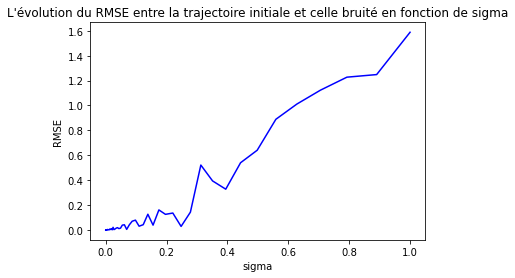

In [58]:
plt.plot(sigma, RMSE_1  , color = 'b')
plt.xlabel('sigma')
plt.ylabel('RMSE')
plt.title("L'évolution du RMSE entre la trajectoire initiale et celle bruité en fonction de sigma")

### Etudions un seul cas.

Ajoutons du bruit.

In [71]:
U1__1 = U1_1 + np.random.normal (0, 1, size =n)
U2__1 = U2_1 + np.random.normal (0, 1, size =n)
X1__1 = X1_1 + np.random.normal (0, 1, size =n)
X2__1 = X2_1 + np.random.normal (0, 1, size =n)
X3__1 = X3_1 + np.random.normal (0, 1, size =n)

In [72]:
C1_1 = 0.2001               
C2_1 = 0.7999


x1i = -4                   # condition initiale de x1
x2i = -0.9                 # condition initiale de x2
x3i = pi              # condition initiale de x3


x1f = 0           # condition final de x1
x2f = 0.2            # condition final de x2
x3f = pi/2         # condition final de x3

In [73]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

c1 = opti.variable(1)
c2 = opti.variable(1)


Lambda = opti.variable(n+2,3)
Mue = opti.variable(1)


opti.minimize( R(U1__1,U2__1,X1__1,X2__1,X3__1, Lambda,Mue, c1, c2 , x1i,x2i,x3i, x1f,x2f,x3f ))  

opti.subject_to( 0 <= c1)
opti.subject_to( 0 <= c2 )
opti.subject_to(  c1 + c2 == 1)


opti.solver('ipopt')    

sol = opti.solve()

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:     7008

Total number of variables............................:     1509
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [74]:
C1 = sol.value(c1)
C2 = sol.value(c2)


In [75]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

u1 = opti.variable(n)
u2 = opti.variable(n)
x1 = opti.variable(n)
x2 = opti.variable(n)
x3 = opti.variable(n)

opti.minimize(   (taux/2)*(C1*dot(u1,u1)+C2*dot(u2,u2))   )    # ma fonction objetion

# mes fonctions de contrainte d'égalité:

## pour les condition initial
opti.subject_to( x1[0]==x1i)        
opti.subject_to( x2[0]==x2i)
opti.subject_to( x3[0]==x3i)

opti.subject_to( u1[0] == 0.001 )
opti.subject_to( u2[0] == 0.001 )

opti.subject_to( u1[-1] == 0.01)
opti.subject_to( u2[-1] == 0.01)

## pour les contraintes d'égaliter
opti.subject_to( x1[:n-1]+taux*u1[:n-1]*cos(x3[:n-1])==f(x1) )
opti.subject_to( x2[:n-1]+taux*u1[:n-1]*sin(x3[:n-1])==f(x2) )
opti.subject_to( x3[:n-1]+taux*u2[:n-1] ==f(x3))

## pour les conditions finales
opti.subject_to( x1[-1]==x1f)
opti.subject_to( x2[-1]==x2f)
opti.subject_to( x3[-1]==x3f)


opti.solver('ipopt')      # suivant la méthode de KKT


sol = opti.solve()

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:     5499
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1998

Total number of variables............................:     2500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1507
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [76]:
X1__1_1 = sol.value(x1)
X2__1_1 = sol.value(x2)


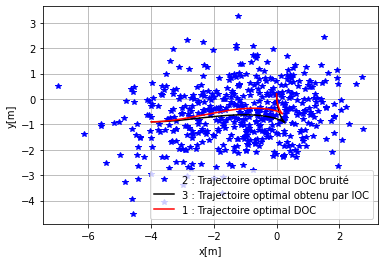

In [77]:
plt.plot(X1__1, X2__1 ,'*', color = 'b', label = '2 : Trajectoire optimal DOC bruité')
plt.plot(X1__1_1, X2__1_1 , color = 'black', label = "3 : Trajectoire optimal obtenu par IOC")
plt.plot(X1_1, X2_1 , color = 'red', label = '1 : Trajectoire optimal DOC')

plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.grid(True)
plt.legend()

In [78]:
print(C1)
print(C2)

0.1350335541062602
0.8649664458937397
